<a href="https://colab.research.google.com/github/LIONPANJSHIR/ML/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , BaggingClassifier , VotingClassifier , StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , roc_curve , roc_auc_score
import matplotlib.pyplot as plt

In [51]:
df = sklearn.datasets.load_breast_cancer()

df = pd.DataFrame(df.data , columns= df.feature_names).join(pd.Series(df.target , name='target'))

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [52]:
import missingno as msn
plt.figure(figsize=(5,5))
msn.matrix(df)

<Axes: >

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [54]:

# --- Police d'écriture professionnelle ---
!wget -q https://github.com/google/fonts/raw/main/ofl/lato/Lato-Regular.ttf -O Lato-Regular.ttf
import matplotlib.font_manager as fm
fm.fontManager.addfont("Lato-Regular.ttf")

# ---  Style global (dark mode + Lato) ---
sns.reset_defaults()
plt.style.use("ggplot")

plt.rcParams['font.family'] = 'Lato'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'medium'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.8


In [55]:

# palette = ["#00C9A7", "#FF6B6B"]

# class_counts = df["target"].value_counts().sort_index()
# total = len(df)
# percentages = (class_counts / total * 100).round(2)

# plt.figure(figsize=(7, 5))
# ax = sns.countplot(
#     data=df,
#     x="target",
#     hue="target",
#     palette=palette,
#     edgecolor="black",
#     linewidth=1.1
# )

# plt.title("Répartition des classes", fontsize=15, fontweight='bold', pad=15)
# plt.xlabel("Classe", fontsize=12,color="black")
# plt.ylabel("Nombre d'observations", fontsize=12)

# for i, container in enumerate(ax.containers):
#     labels = [
#         f"{int(class_counts[i])}\n({percentages[i]}%)"
#         for i in range(len(container.datavalues))
#     ]
#     ax.bar_label(
#         container,
#         labels=labels,
#         label_type='edge',
#         fontsize=10,
#         color='black',
#         padding=2
#     )


# plt.grid(True, lw=0.3, ls="--", color="black", alpha=0.4)
# leg = plt.legend(title="Classe", loc="upper left",
#         shadow=True , fontsize=10)
# # plt.xlabel(labelcolor="red")
# label_map = {1: "Bénigne", 0: "Maligne"}  # corrige l’orthographe
# #  Remap des ticks x → libellés lisibles
# ax.set_xticks(range(len(order)))
# ax.set_xticklabels([label_map[k] for k in order], fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
# plt.show()


Parmi l’ensemble des patient·es inclus dans cette étude, 212 ont été identifiés comme présentant des cellules potentiellement cancéreuses (classées “malignes”), tandis que 357 ont été diagnostiqués comme porteurs de cellules bénignes.

Cette répartition illustre une prévalence plus importante des cas bénins au sein de l’échantillon, mais souligne également la proportion non négligeable de patients à risque, justifiant pleinement l’intérêt d’un modèle de détection précoce et fiable.

Ainsi, l’analyse vise à comprendre les caractéristiques différenciant ces deux groupes — notamment au travers de variables morphologiques (comme l’aire moyenne, la texture, ou la compacité des cellules) afin de mieux prédire la nature tumorale des tissus observés

## Analyse univariées

<Figure size 500x500 with 0 Axes>

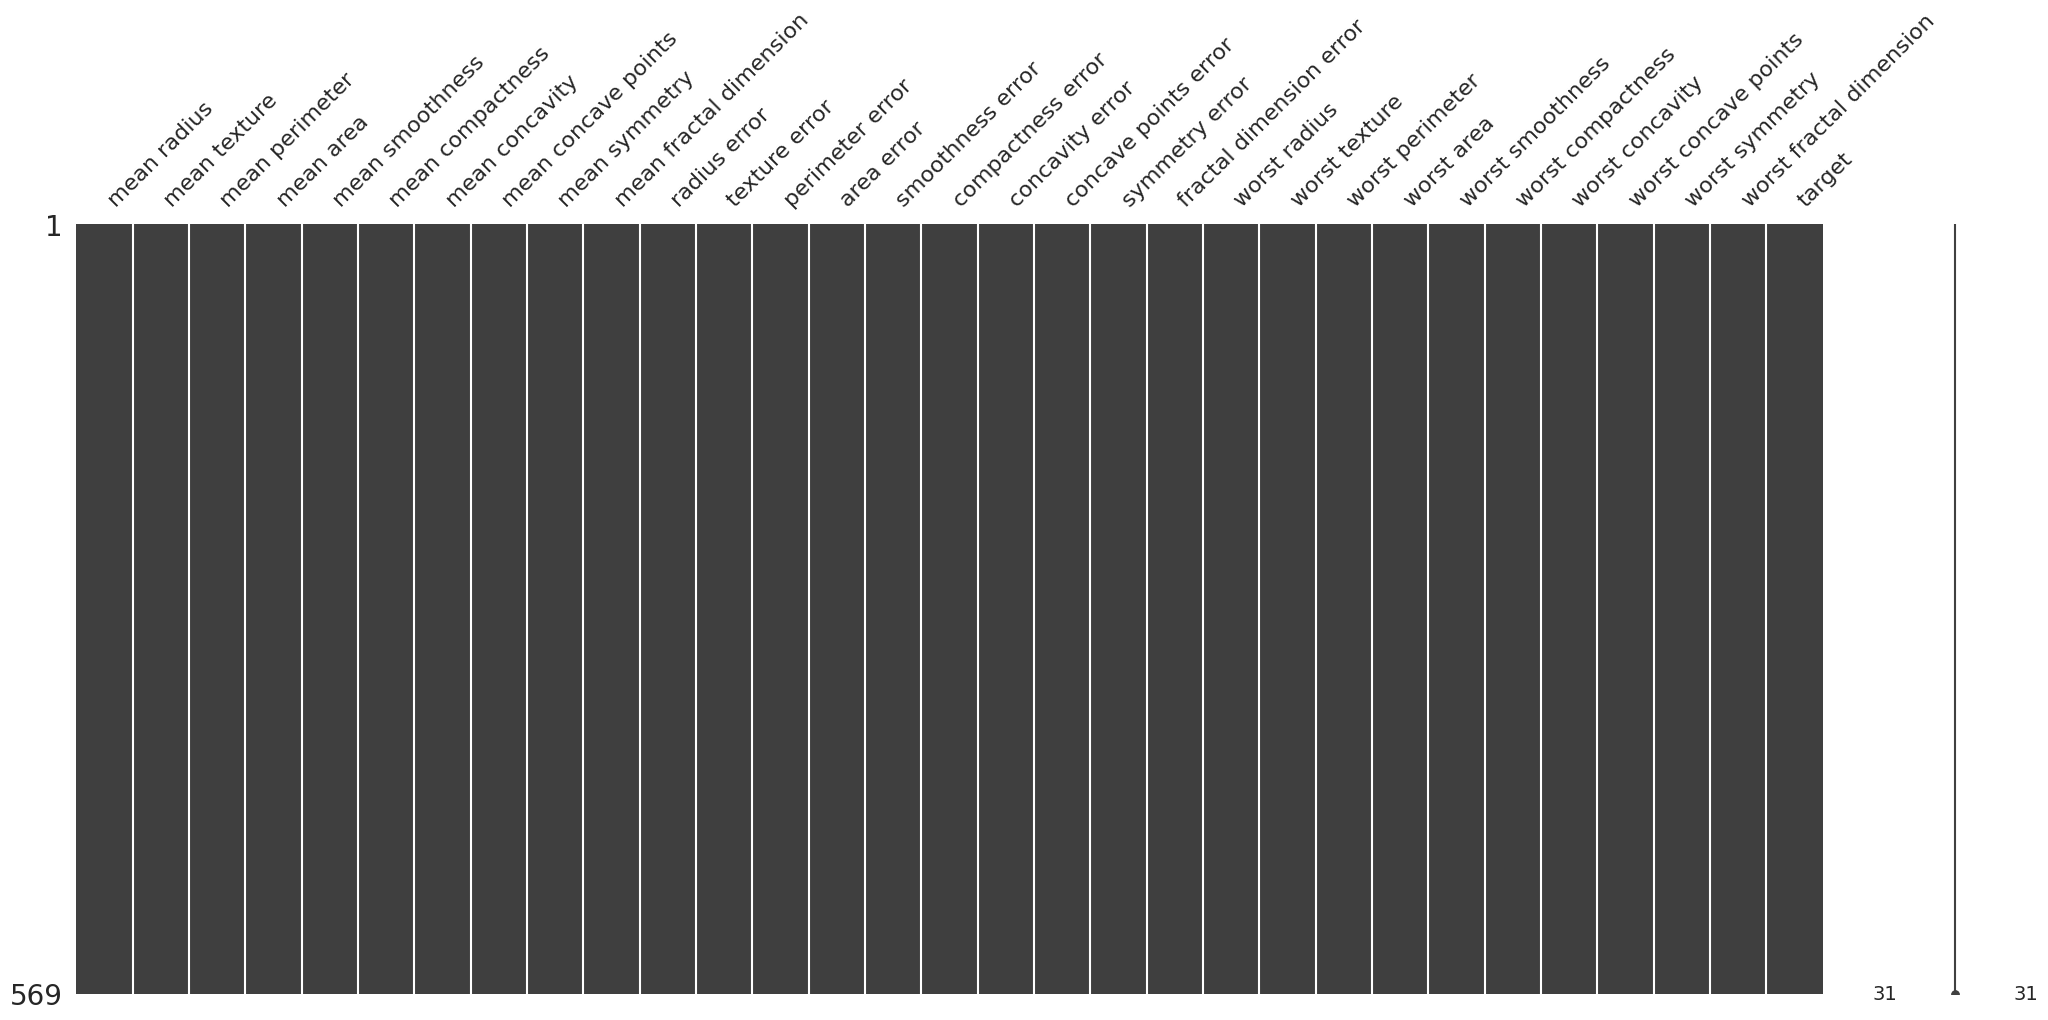

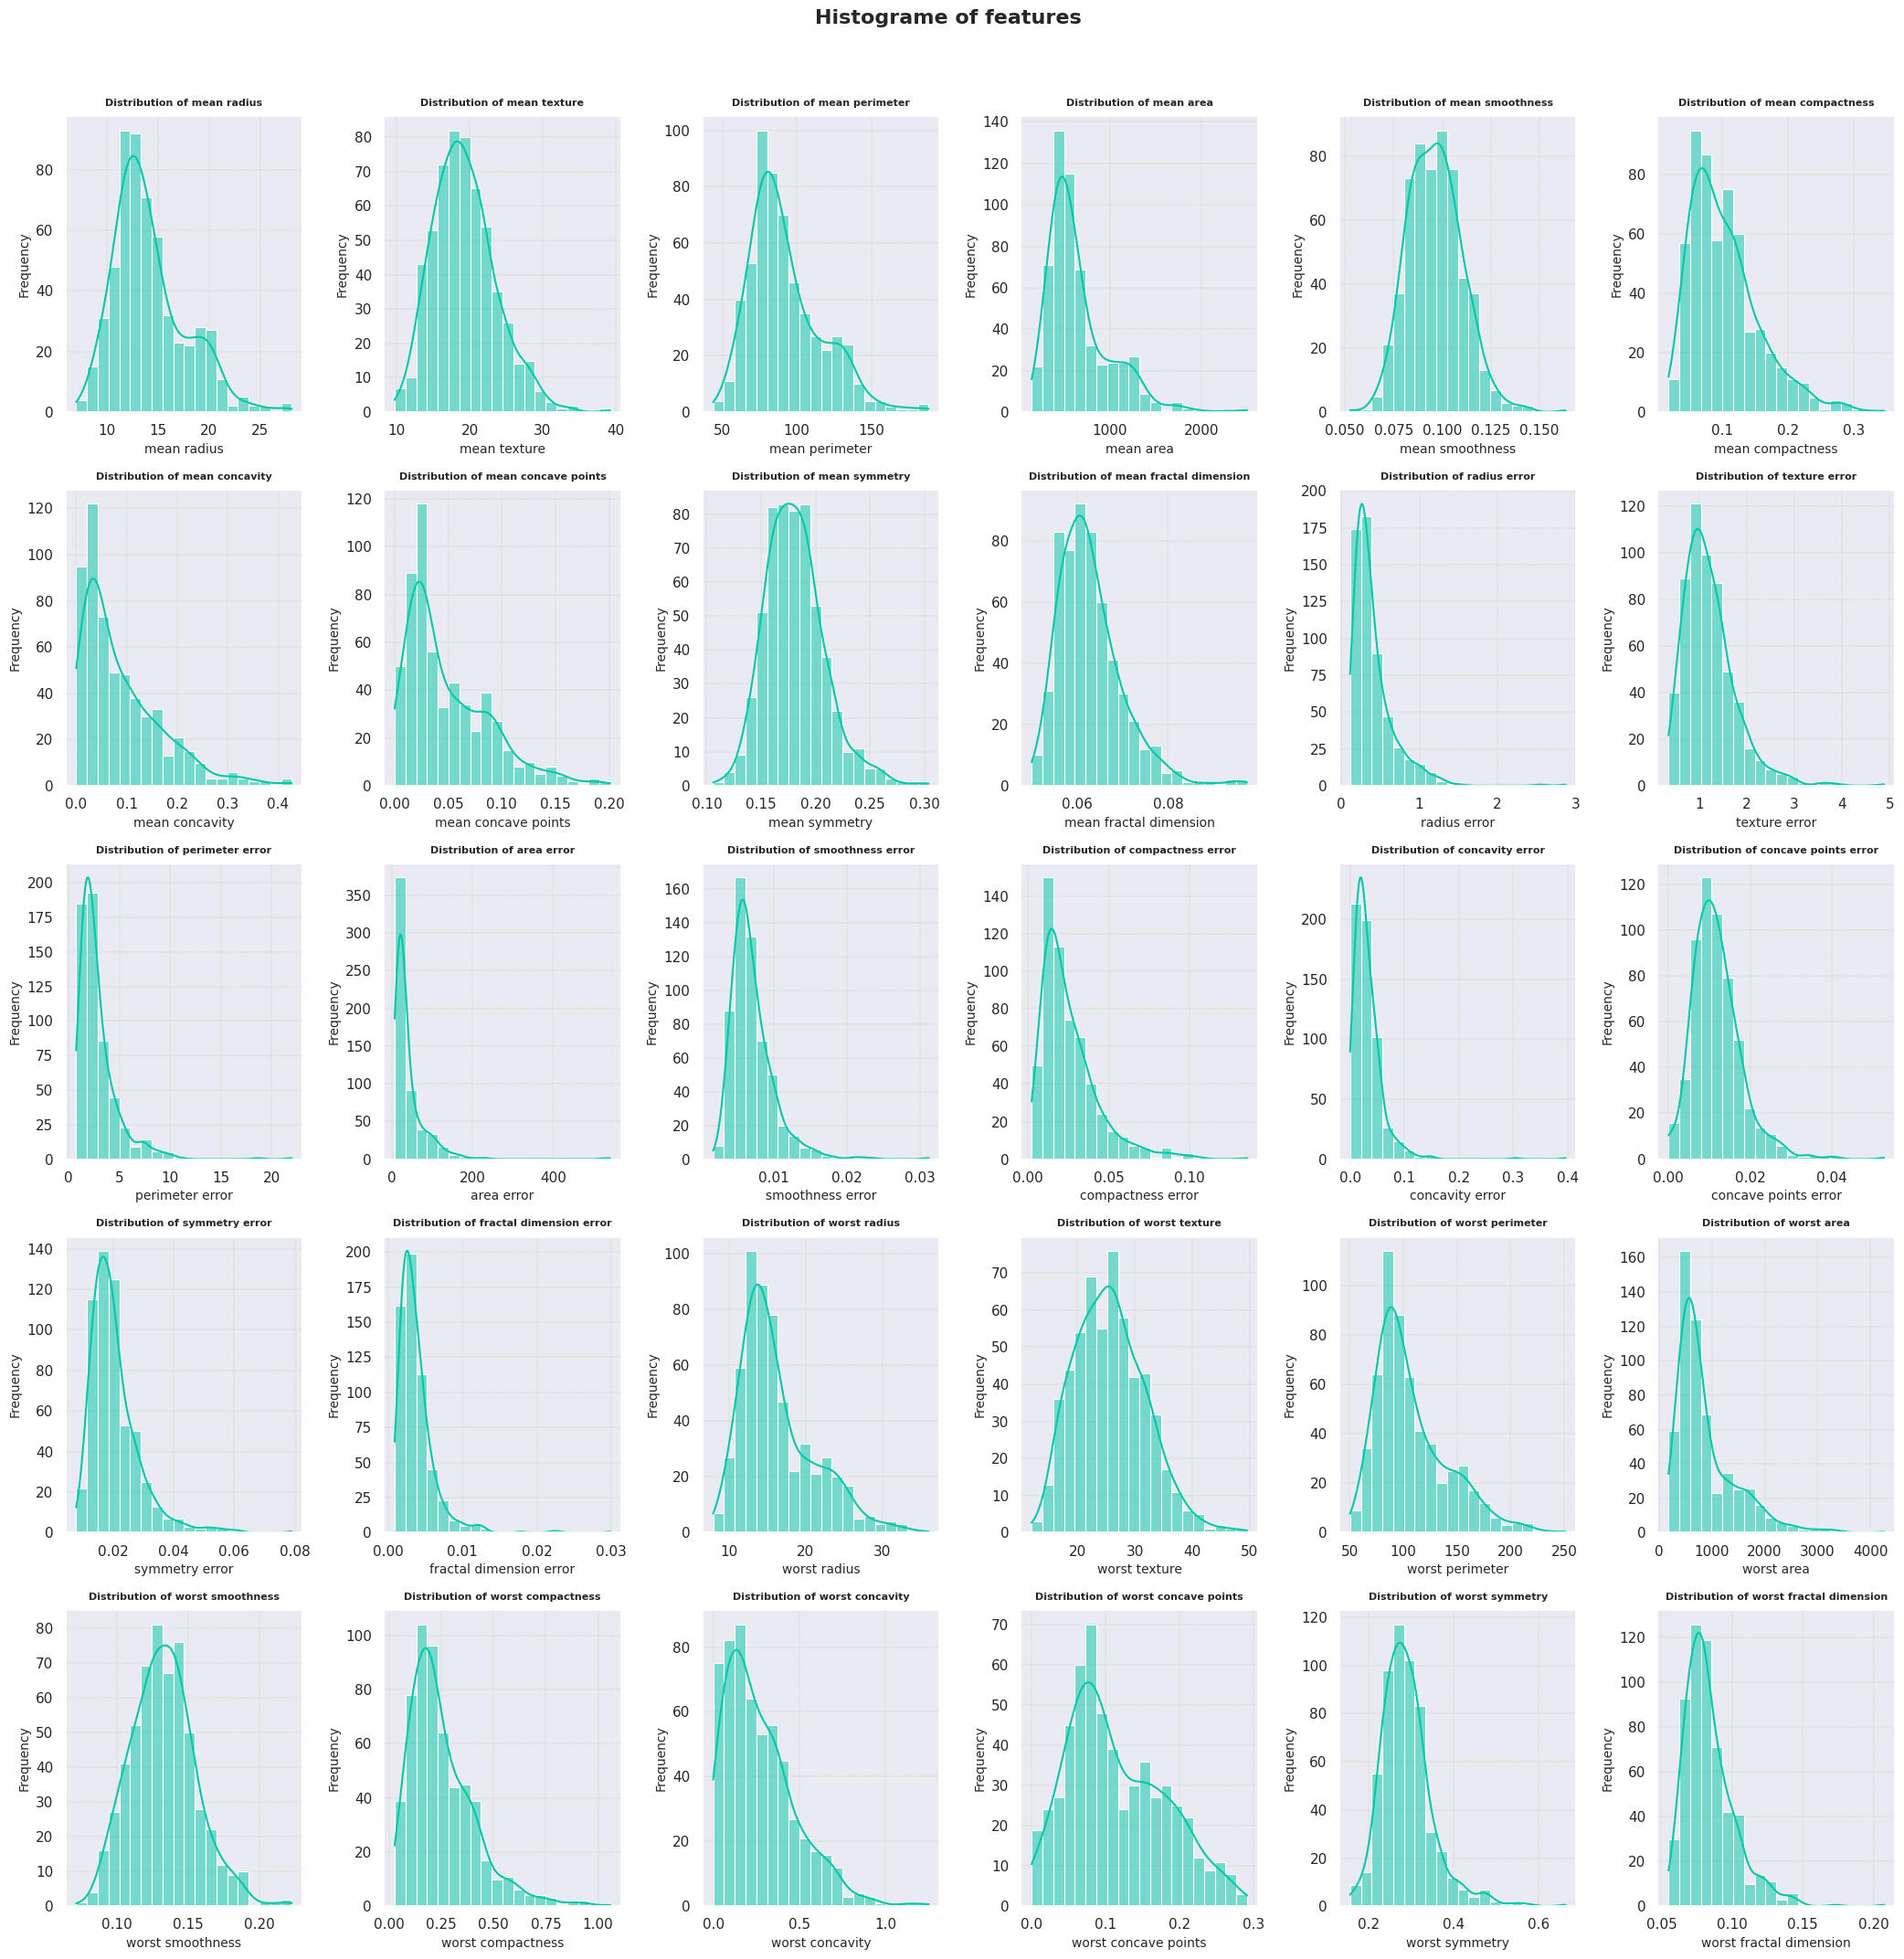

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# --- Sélection des variables numériques (hors cible) ---
vars_num = [v for v in df.columns if v != "target"]

# --- Paramètres d'affichage ---
ncols = 6
nrows = math.ceil(len(vars_num) / ncols)

plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(21, 21))
axes = axes.flatten()

# --- Palette de couleurs ---
color = "#00C9A7"

# --- Boucle sur les variables ---
for i, var in enumerate(vars_num):
    sns.histplot(
        data=df,
        x=var,
        bins=20,
        kde=True,
        color=color,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {var}", fontsize=8, fontweight="bold", pad=8)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].grid(True, lw=0.3, ls="--", color="gray", alpha=0.4)

# --- Supprimer les axes vides s'il y en a ---
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# --- Titre global ---
fig.suptitle("Histograme of features ", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


* La plus part des variables sont étalé vers la droite
* A priori nous avons pas trop de valeur aberrante
* si on décidais d'utiliser des modéle de Ml il serais intéressant de transformer les variables (logarithme, box-cox ou autre )

In [57]:
df = df.dropna()
X = df[df.columns [df.columns != 'target']]
y = df['target']
st_df = (X-X.mean())/X.std()

In [58]:
# pd.concat([ st_df,df['target']])
# df['target'].value_counts()

## Que peut-on dire sur les differentes distributions en fonction du diagnostic ?

### Comparaison des distributions en fonction de la médiane

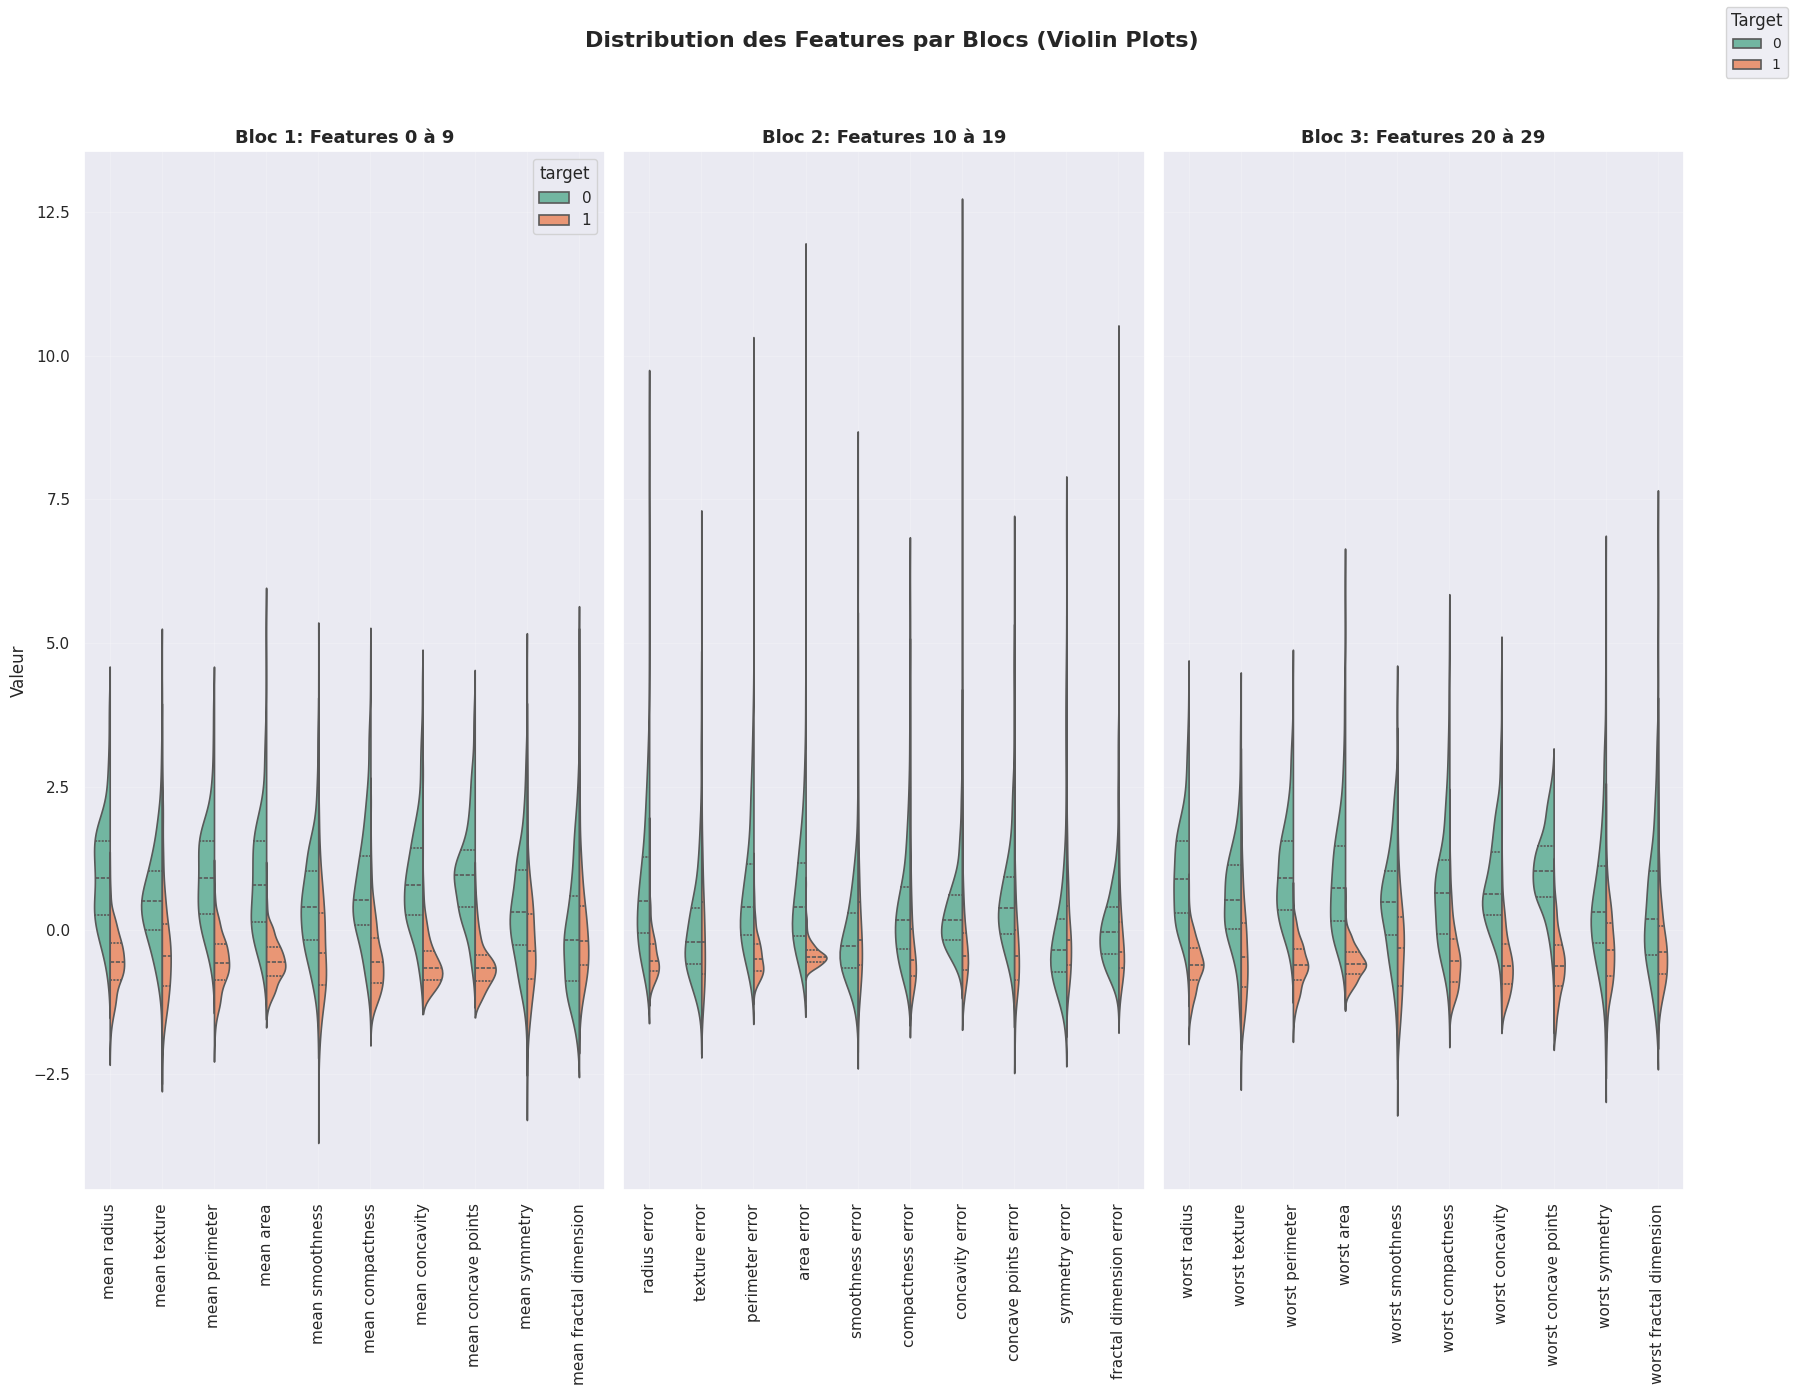

In [59]:




blocks = [
    st_df.iloc[:, 0:10],
    st_df.iloc[:, 10:20],
    st_df.iloc[:, 20:30]
]

# --- 2️⃣ Fusion et transformation en format long ---
melted_blocks = []
for block in blocks:
    temp_df = pd.concat([block, y], axis=1)
    melt_df = pd.melt(
        temp_df,
        id_vars="target",
        var_name="features",
        value_name="value"
    )
    melted_blocks.append(melt_df)

# --- 3️⃣ Création de la figure ---
fig, axes = plt.subplots(1, 3, figsize=(18, 14), sharey=True)
plt.suptitle("Distribution des Features par Blocs (Violin Plots)", fontsize=16, fontweight="bold")

# Palette de couleurs personnalisée
# palette = {"Class0": "#3498db", "Class1": "#e74c3c"} if "Class0" in y["target"].unique() else "Set2"

# --- 4️⃣ Boucle de visualisation ---
for i, (ax, melt_df) in enumerate(zip(axes, melted_blocks), start=1):
    sns.violinplot(
        data=melt_df,
        # showmedians=True,
        x="features",
        y="value",
        hue="target",
        split=True,
        inner="quart",
        # gap=0.,
        linewidth=1.2,
        # ls="--",
        palette="Set2",
        ax=ax
    )
    ax.set_title(f"Bloc {i}: Features {10*(i-1)} à {10*i - 1}", fontsize=13, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Valeur" if i == 1 else "")
    ax.tick_params(axis="x", rotation=90)
    ax.grid(alpha=0.2)
    if i != 1:
        ax.get_legend().remove()

# --- 5️⃣ Légende globale et ajustement ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Target", loc="upper right", fontsize=10)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


On observe que la distribution des variables présente, pour la majorité d’entre elles, une légère **séparabilité** entre les classes.
Sur la figure des violin plots, on distingue clairement des **différences** de **médianes** selon la classe.

Par exemple, si l’on se focalise sur la variable **Mean Concavity** (Concavité moyenne), on remarque que les deux distributions se chevauchent très peu et que leurs **médianes** sont nettement éloignées, ce qui suggère un fort pouvoir **discriminant** de cette variable.
À l’inverse, pour la variable **Fractal Dimension** (Dimension fractale), les deux distributions se **superposent** presque entièrement et leurs médianes sont **proches**, traduisant une **faible capacité de séparation** entre les classes.

ps: On pourrait s'appuyez sur la figure suivant pour plus de clartés en ce qui conserne la séparabilité des deux classes (en fonction de la médiane)

Il est important de noter que les données ont été **standardisées**, afin **d’harmoniser** les échelles de grandeur et de rendre la comparaison entre variables plus pertinente.

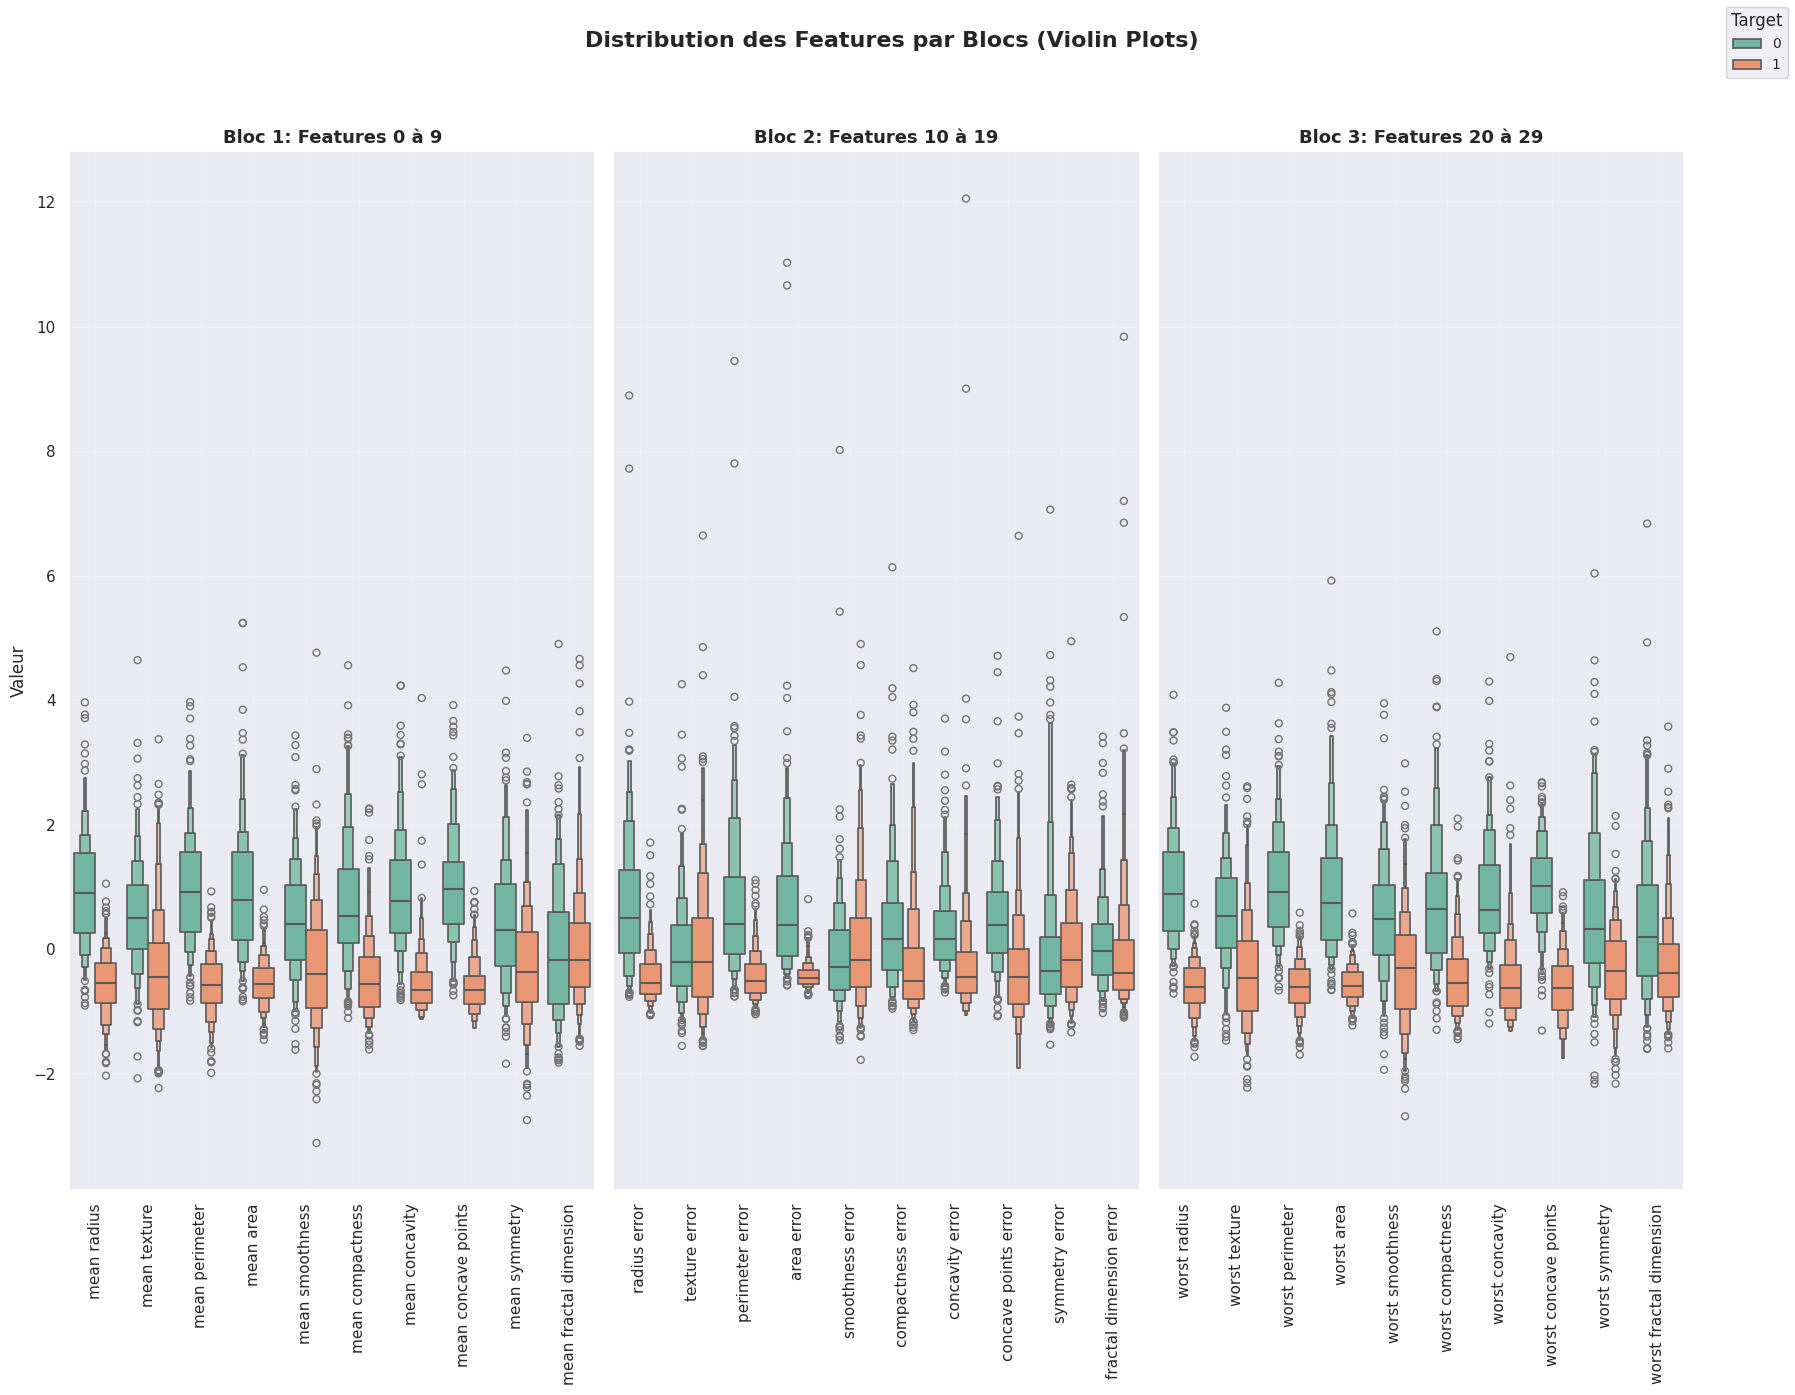

In [60]:

# Préparation des sous-ensembles

blocks = [
    st_df.iloc[:, 0:10],
    st_df.iloc[:, 10:20],
    st_df.iloc[:, 20:30]
]

# Fusion et transformation en format long
melted_blocks = []
for block in blocks:
    temp_df = pd.concat([block, y], axis=1)
    melt_df = pd.melt(
        temp_df,
        id_vars="target",
        var_name="features",
        value_name="value"
    )
    melted_blocks.append(melt_df)

fig, axes = plt.subplots(1, 3, figsize=(18, 14), sharey=True)
plt.suptitle("Distribution des Features par Blocs (Violin Plots)", fontsize=16, fontweight="bold")

# Palette de couleurs personnalisée
# palette = {"Class0": "#3498db", "Class1": "#e74c3c"} if "Class0" in y["target"].unique() else "Set2"

for i, (ax, melt_df) in enumerate(zip(axes, melted_blocks), start=1):
    sns.boxenplot(
        data=melt_df,
        # showmedians=True,
        x="features",
        y="value",
        hue="target",
        linewidth=1.2,
        palette="Set2",
        ax=ax
    )
    ax.set_title(f"Bloc {i}: Features {10*(i-1)} à {10*i - 1}", fontsize=13, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Valeur" if i == 1 else "")
    ax.tick_params(axis="x", rotation=90)
    ax.grid(alpha=0.2)
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Target", loc="upper right", fontsize=10)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


Points intéressants a notés :
  * Certaines variables ont des variables <<extrême>> isolé
  * Certaines paires de variables, notamment Compactness ***Error vs Concavity Error et Mean Concavity vs Mean Concave Points***, présentent des profils de distribution presque identiques, indiquant une possible redondance d’information ou une corrélation élevée.
Une analyse de corrélation sera réalisée ultérieurement afin de confirmer ces relations et d’évaluer la nécessité d’une réduction de dimensionnalité.

#### Les graphiques ci-dessous mettent en évidence la variance des variables et la manière dont les deux classes se distinguent.

/tmp/ipython-input-3215685570.py:3: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.



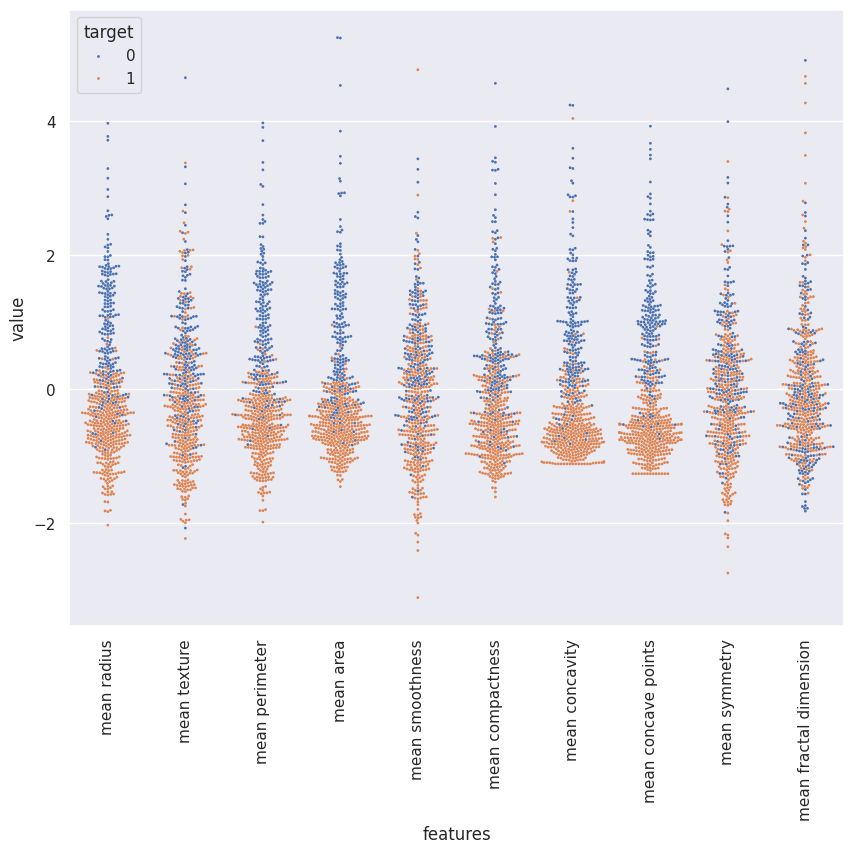

In [61]:
df_melt = pd.melt(pd.concat([st_df.iloc[:,0:10], y], axis=1),id_vars='target',var_name='features',value_name='value')
plt.figure(figsize=(10,8))
sns.swarmplot(
    data=df_melt,
    y="value",
    x="features",
    hue='target',
    # alpha=0.2,
    edgecolor="gray",
    size=2)
plt.xticks(rotation=90)
plt.show()

Les variables` mean texture, mean area, mean concavity et mean concave points` apparaissent comme d’excellentes **candidates discriminantes**, car elles offrent une **séparation** claire entre les deux classes en fonction de leurs valeurs.
**Cependant**, on observe la présence de quelques points **atypiques** appartenant à la **classe opposée** autrement dit, des échantillons qui ne se situent pas dans la “bonne” catégorie visuelle.
Malgré ces exceptions, ces variables demeurent hautement **pertinentes** pour la **modélisation** et pourraient contribuer de manière **significative** à la capacité de **classification** du modèle.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical

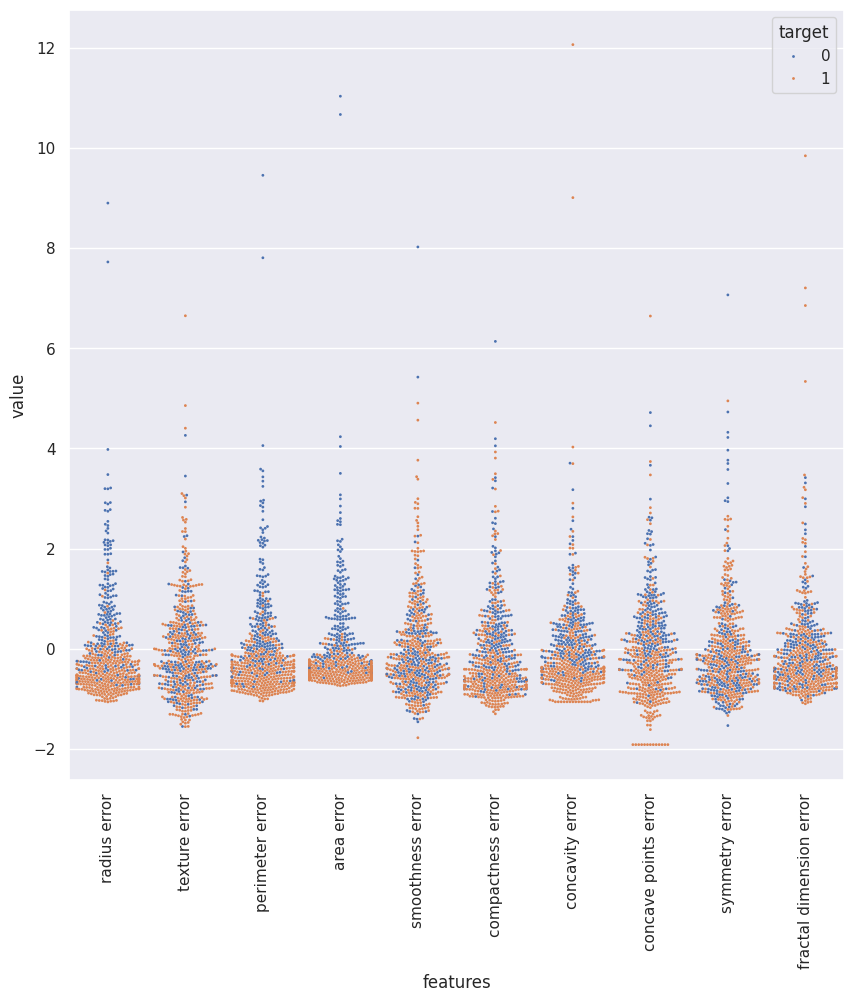

In [62]:
df_melt = pd.melt(pd.concat([st_df.iloc[:,10:20], y], axis=1),id_vars='target',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(
    data=df_melt,
    y="value",
    x="features",
    hue='target',
    edgecolor="black",
    size=2)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



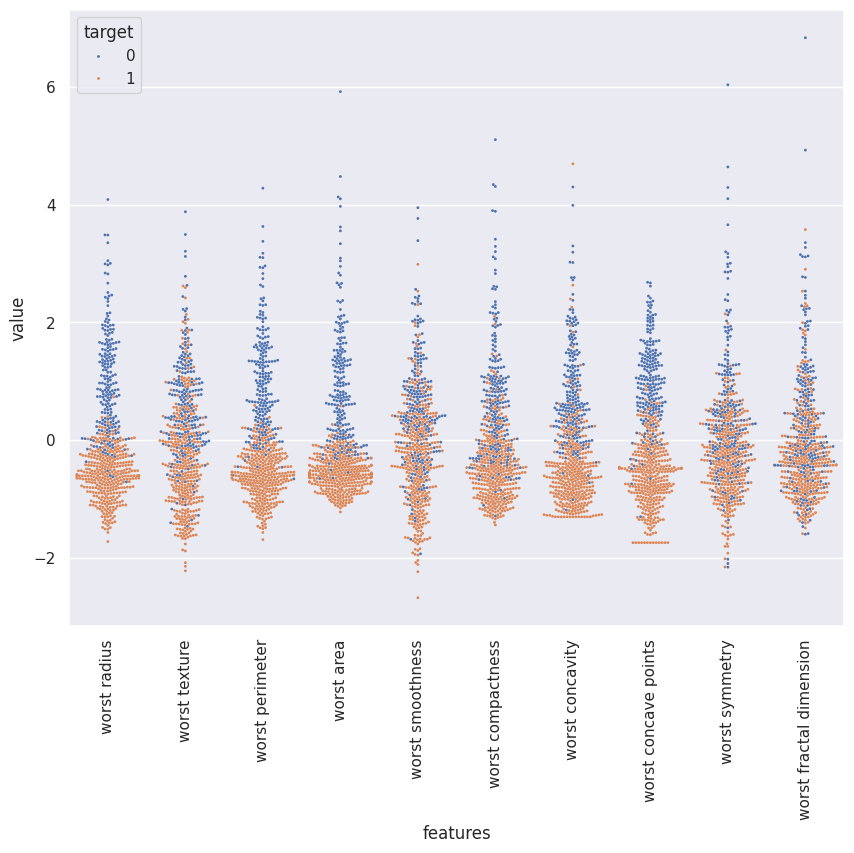

In [63]:
df_melt = pd.melt(pd.concat([st_df.iloc[:,20:30], y], axis=1),id_vars='target',var_name='features',value_name='value')
plt.figure(figsize=(10,8))
sns.swarmplot(
    data=df_melt,
    y="value",
    x="features",
    hue='target',
    edgecolor="black",
    size=2)
plt.xticks(rotation=90)
plt.show()

Les **variables**` worst radium, worst perimeter & wors area` montrent une bonne/moyenne séparation entre les classes, malgré quelques valeurs mal classées visuellement.
Elles restent néanmoins pertinentes et informatives pour la suite de l’analyse prédictive.

In [64]:


# # --- liste des variables (hors cible) ---
# vars_num = [v for v in df.columns if v != "target"]

# # --- grille : 4 colonnes (2 colonnes par variable => 2 variables par ligne) ---
# ncols = 6                      # [KDE, Box] x 2 variables
# n_pairs = len(vars_num)        # nombre de variables
# nrows = math.ceil(n_pairs * 2 / ncols)

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))
# axes = axes if isinstance(axes, np.ndarray) else np.array([[axes]])  # robustesse
# axes = axes.reshape(nrows, ncols)

# # --- nettoyage préalable des axes (on masquera ceux non utilisés) ---
# for r in range(nrows):
#     for c in range(ncols):
#         axes[r, c].set_visible(False)

# # --- placement : pour chaque variable -> 2 colonnes (KDE puis Box) ---
# for i, var in enumerate(vars_num):
#     # index de départ (position de la colonne gauche de la paire)
#     idx = i * 2
#     r = idx // ncols
#     c = idx % ncols

#     # --- KDE ---
#     ax_kde = axes[r, c]
#     ax_kde.set_visible(True)
#     sns.kdeplot(
#         data=df, x=var, hue="target", fill=True, common_norm=False,
#         alpha=0.5, palette=palette, linewidth=1.5, ax=ax_kde
#     )
#     ax_kde.set_title(f"KDE — {var}", fontsize=12, fontweight="bold", pad=8)
#     ax_kde.set_xlabel(var)
#     ax_kde.set_ylabel("Density")
#     ax_kde.grid(True, lw=0.3, ls="--", color="gray", alpha=0.4)

#     # --- Boxplot (colonne suivante) ---
#     if c + 1 < ncols:
#         ax_box = axes[r, c + 1]
#     else:
#         # si on tombe en fin de ligne, passer au début de la ligne suivante
#         r2 = r + 1
#         c2 = 0
#         ax_box = axes[r2, c2]
#     ax_box.set_visible(True)
#     sns.boxplot(
#         data=df, x="target", y=var, palette=palette,
#         width=0.6, linewidth=1.1, ax=ax_box
#     )
#     ax_box.set_title(f"Boxplot — {var} by target", fontsize=12, fontweight="bold", pad=8)
#     ax_box.set_xlabel("target")
#     ax_box.set_ylabel(var)
#     ax_box.grid(True, lw=0.3, ls="--", color="gray", alpha=0.4)

# # --- titre global & mise en page ---
# fig.suptitle("Distributions of features KDE and boxplot", fontsize=16, fontweight="bold", y=1.02)
# plt.tight_layout()
# plt.show()


## Corrélation

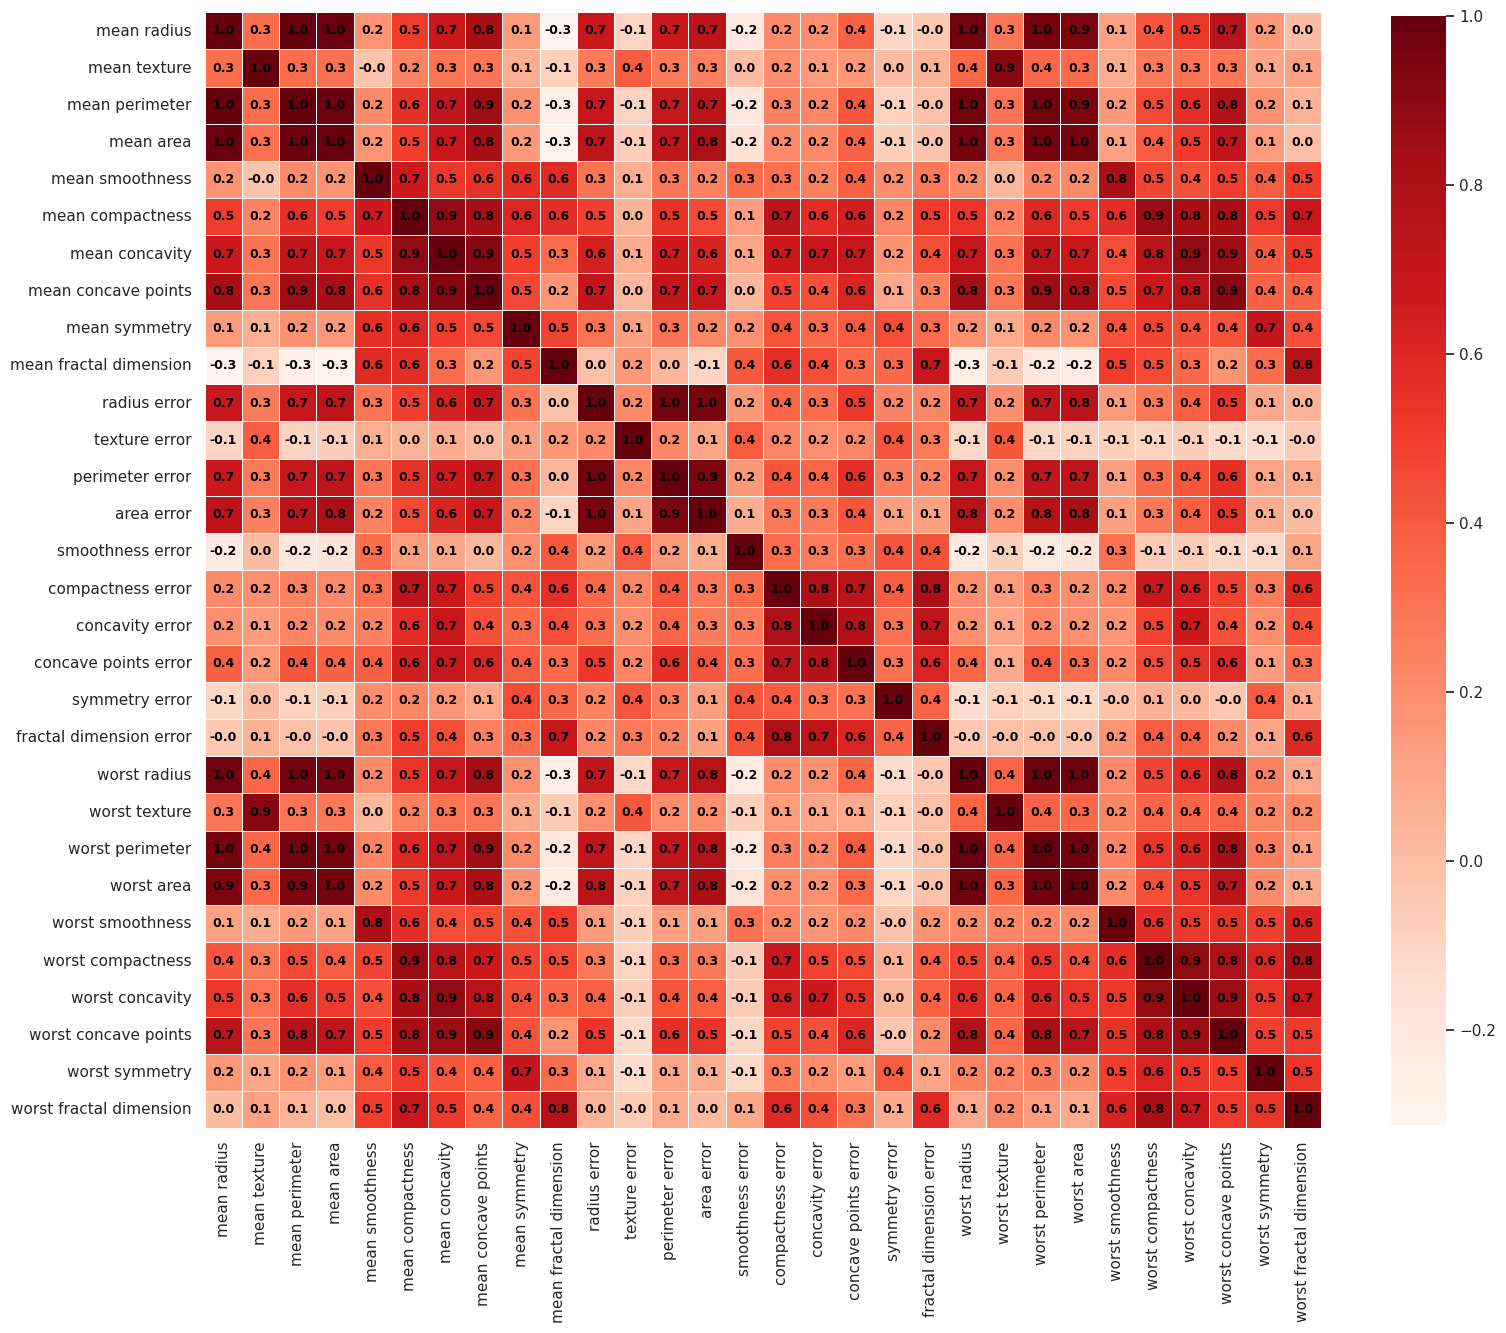

In [65]:

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,
    cmap="Reds",
    cbar_kws={"shrink": 0.8},  # barre latérale réduite
    square=True,
    annot_kws={"size": 9, "color": "black", "fontweight": "bold"}
    # mask = np.triu(X.corr())
)
plt.show()


## Selection des variables


##  Sélection de variables (*Feature Selection*)

La **sélection de variables** (ou *feature selection*) consiste à **identifier et retenir les variables les plus pertinentes** d’un jeu de données pour la construction d’un modèle de Machine Learning.
Autrement dit, il s’agit de **réduire la dimensionnalité** du dataset tout en **préservant l’information essentielle** nécessaire à la prédiction de la variable cible.

Cette étape s’inscrit dans le processus de **préparation des données**, après la phase de nettoyage et avant l’entraînement du modèle.


### Pourquoi faire de la Feature Selection ?

La sélection de variables présente plusieurs **objectifs fondamentaux** :

1. **Améliorer la performance du modèle**
   En supprimant les variables inutiles ou redondantes, on réduit le risque de **surapprentissage** (*overfitting*) et on améliore la **généralisation** du modèle sur de nouvelles données.

2. **Réduire la complexité computationnelle**
   Moins de variables signifie des modèles **plus rapides à entraîner** et **plus légers** à déployer, ce qui est crucial dans les environnements de production.

3. **Renforcer l’interprétabilité**
   Un modèle construit sur un ensemble restreint de variables clés est **plus lisible**, facilitant l’analyse des **facteurs influents** sur la variable cible.

4. **Éliminer la redondance et le bruit**
   Certaines variables peuvent contenir des informations **fortement corrélées** ou **non pertinentes** ; les retirer permet d’obtenir un modèle plus stable.


###  Méthodes utilisées pour la sélection des variables

Il existe plusieurs approches pour effectuer la sélection de variables, classées selon leur logique et leur niveau d’intégration avec le modèle.
Dans cette étude, nous utilisons **trois grandes familles de méthodes**, combinant robustesse statistique et efficacité pratique.


#### **1. Méthodes de filtrage (Filter Methods)**

Ces méthodes reposent sur des **mesures statistiques** calculées entre les variables explicatives et la variable cible, indépendamment du modèle.

* **Analyse de corrélation** :
  Permet d’identifier les variables fortement corrélées entre elles (corrélation > 0.85 par exemple).
  Lorsqu’un groupe de variables mesure la même information, une seule est conservée afin d’éviter la redondance.

* **Tests de dépendance avec la cible** :
  Selon le type de variable, on peut utiliser :

  * Le test **ANOVA (f_classif)** pour les variables numériques face à une cible catégorielle,
  * Le **test du Chi²** pour les variables catégorielles,
  * Ou encore la **mutual information**, qui mesure la quantité d’information partagée entre une variable et la cible.

Ces méthodes sont **simples, rapides et interprétables**, mais elles ne prennent pas en compte les interactions entre variables.


#### **2. Méthodes encapsulées (Wrapper Methods)**

Ces techniques évaluent **directement la performance du modèle** en testant différents sous-ensembles de variables.
Elles sélectionnent l’ensemble qui maximise une métrique donnée (accuracy, F1-score, AUC…).

Les deux approches principales sont :

* **RFE (Recursive Feature Elimination)** :
  Cette méthode entraîne un modèle (souvent un arbre ou une régression logistique), calcule l’importance des variables, puis **élimine récursivement** la moins utile à chaque itération.

* **Sequential Feature Selection (SFS)** :
  Ajoute ou retire une variable à la fois selon son impact sur la performance du modèle, en s’appuyant sur une validation croisée.

Ces méthodes sont **plus précises** mais aussi **plus coûteuses en calcul**, surtout sur de grands jeux de données.


#### **3. Méthodes intégrées (Embedded Methods)**

Elles intègrent la sélection directement dans le processus d’apprentissage du modèle.

* **Régularisation Lasso (L1)** :
  Cette technique pénalise la somme des valeurs absolues des coefficients. Les coefficients les moins importants sont forcés à zéro, ce qui revient à **supprimer automatiquement** certaines variables.

* **Forêts aléatoires (Random Forests) et modèles ensemblistes (XGBoost, LightGBM)** :
  Ces modèles attribuent à chaque variable une **importance** (basée sur la réduction d’impureté ou le gain d’information).
  Les variables les plus contributives sont conservées, les autres écartées.

* **Méthode Boruta** :
  Variante robuste basée sur Random Forest, elle crée des variables aléatoires (*shadow features*) et ne conserve que celles plus informatives que le bruit.
  C’est une méthode particulièrement stable, adaptée aux jeux de données bruités.



### Stratégie adoptée

Dans notre approche, nous combinons ces différentes familles pour obtenir une **sélection robuste et justifiée** :

1. **Étape 1 : Filtrage par corrélation** → élimination des variables redondantes.
2. **Étape 2 : Sélection univariée (Test de kruskall-Wallis / Mutual Information)** ➡ identification des variables statistiquement liées à la cible.
2.1 **Étape 2.1
3. **Étape 3 : Sélection intégrée (Random Forest / Lasso)** → validation de l’importance réelle des variables dans la performance du modèle.

Cette combinaison permet d’obtenir un sous-ensemble de **variables non redondantes, explicatives et stables**, garantissant un **équilibre entre performance, interprétabilité et efficacité computationnelle.**



###  Filtrage par corrélation

Comme on peut l’observer sur la matrice de corrélation, certaines variables présentent des corrélations très fortes entre elles, ce qui signifie qu’elles mesurent pratiquement la même information.
Afin d’éviter la redondance et de réduire la multicolinéarité, il est judicieux de ne conserver qu’une seule variable représentative par groupe corrélé.

In [66]:


# --- Calcul de la matrice de corrélation
corr_matrix = X.corr().abs()  # Valeur absolue pour ignorer le signe

# --- Supprimer la diagonale et la partie supérieure (pour ne pas dupliquer les paires)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_lower = corr_matrix.mask(mask)

# --- Seuil de corrélation
threshold = 0.8

# --- Extraction des paires corrélées au-dessus du seuil
high_corr = (
    corr_lower.stack()                            # Convertir en série (index pairs)
    .reset_index()                                # Remettre sous forme de DataFrame
    .rename(columns={'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Corrélation'})
    .query('Corrélation >= @threshold')           # Filtrer selon le seuil
    .sort_values(by='Corrélation', ascending=False)
    .reset_index(drop=True)
)

print("Les 5 premiers valeurs de la table de corrélation par pair")
print(f"--"*40)
high_corr.sort_values(by='Variable_1')



Les 5 premiers valeurs de la table de corrélation par pair
--------------------------------------------------------------------------------


,Variable_1,Variable_2,Corrélation
43,area error,mean area,0.800086
17,area error,perimeter error,0.937655
14,area error,radius error,0.951830
41,concavity error,compactness error,0.801268
40,fractal dimension error,compactness error,0.803269
2,mean area,mean radius,0.987357
3,mean area,mean perimeter,0.986507
32,mean concave points,mean radius,0.822529
31,mean concave points,mean area,0.823269
29,mean concave points,mean compactness,0.831135


In [67]:
import plotly.graph_objects as go

# --- Création du DataFrame ---
data = {
    "Groupe": [
        "Bloc 1 : Taille / Forme globale",
        "Bloc 2 : Texture / Compacité / Concavité",
        "Bloc 3 : Texture et fractale"
    ],
    "Variables fortement corrélées": [
        "`mean radius`, `mean perimeter`, `mean area`, `radius error`, `perimeter error`, `area error`, `worst radius`, `worst perimeter`, `worst area`",
        "`mean compactness`, `mean concavity`, `mean concave points`, `worst compactness`, `worst concavity`, `worst concave points`, `concavity error`, `compactness error`",
        "`mean texture`, `worst texture`, `fractal dimension`, `worst fractal dimension`, `smoothness`"
    ],
    "Corrélations typiques": ["0.94 – 0.99", "0.80 – 0.92", "0.80 – 0.91"],
    "Commentaire": [
        "Mesurent une même dimension géométrique (taille du noyau tumoral).==> Garder une ou deux max.",
        "Décrivent la forme des contours (degré de concavité).==> À regrouper, car très corrélées.",
        "Moins de redondance mais corrélations notables dans texture."
    ]
}

df_groups = pd.DataFrame(data)

# --- Tableau interactif ---
fig = go.Figure(
    data=[go.Table(
        header=dict(
            values=list(df_groups.columns),
            fill_color='#0E1117',
            font=dict(color='white', size=13, family="Lato", weight='bold'),
            align='left',
            height=35
        ),
        cells=dict(
            values=[df_groups[col] for col in df_groups.columns],
            fill_color='#1E1E1E',
            align='left',
            font=dict(color='white', size=12),
            height=45
        )
    )]
)

fig.update_layout(
    title="Groupes de variables fortement corrélées",
    title_font=dict(size=18, color="white", family="Lato"),
    margin=dict(l=0, r=0, t=60, b=0),
    width=1100,
    height=400,
    paper_bgcolor='#0E1117',
    plot_bgcolor='#0E1117'
)

fig.show()


On se basant sur l'analyse faite sur les distributions des variables et la matrice de corrélation :

### Dans le groupe 1 :    

Les trois variables `mean radius`, `mean perimeter`, `mean area`  sont fortement corrélées, car elles décrivent toutes la taille globale de la tumeur.
Par souci de simplicité, nous choisissons de conserver `mean area` comme variable représentative

Les `radius error`, `perimeter error`, `area error` sont également fortement corrélés entre elle car elles représentent les écarts-types (standard error) des mesures précédentes.
 Étant elles aussi corrélées, nous retenons `area error` comme variable unique de ce groupe.

 Les variables `radius worst`, `worst perimeter`, `worst area` (mesure la plus extrême observée) sont très similaires.
Nous choisissons donc `worst area` comme représentante de ce groupe.

### Dans le groupe 2 :


Les trois variables `mean compactness`, `mean concavity`et `mean concave points`sont fortement corrélées, car elles décrivent toutes la texture de la tumeur (en fonction de a compacité et la concavité).
Par souci de simplicité, nous choisissons de conserver `mean concave points` comme variable représentative de la **texture moyenne**

pour les variable extrême ""**worst**" nous allons choisir`concave points` idem pour les variables d'ecart types

### Dans le groupe 3 :

Les variables liées à la texture montrent une corrélation importante.
Nous choisissons `mean texture`, car elle présente une meilleure stabilité (variance moins grande par rapport a la variable `worst texture`)
et on choisie de garder `mean smoothness`

## Resumé :
Les valeurs conserver* sont : `mean smoothness ,mean texture,concave points,mean concave points, area error et worst area`
Les variales excluent sont :`mean radius`, `mean perimeter`, `radius error`, `perimeter error`,`radius worst`, `worst perimeter`,`mean compactness`, `mean concavity`,`worst texture`,`worst compactness`, `worst concavity`, `concavity error`, `compactness error`"

ps : Conserver par rapport aux **variables corrélé**


---



### Remarques :

Cette sélection est logique et équilibrée :

* Chaque groupe conserve **une seule variable représentative**, évitant la redondance informationnelle.

* Les variables retenues sont **interprétables et statistiquement stables**.

* Le choix repose sur un compromis entre l’analyse visuelle (EDA) et la corrélation mathématique.

**En revanche**, il est important de souligner que ce filtrage reste **empirique** :
il conviendra de valider expérimentalement ces choix via des tests de performance (par exemple, un modèle **Random Forest ou Logistic Regression**) pour s’assurer que la suppression de certaines variables n’entraîne pas de **perte significative d’information**.

In [68]:
# --- Liste des variables à supprimer (corrélées entre elles ou redondantes) ---
to_drop = [
    # Taille / Forme
    "mean radius", "mean perimeter",
    "radius error", "perimeter error",
    "worst perimeter", "worst radius",

    # Concavité / Compacité
    "mean compactness", "mean concavity",
    "worst compactness", "worst concavity",
    "compactness error", "concavity error",

    # Texture
    "worst texture"
]


df_corr_select = df.drop(to_drop,axis=1)
X1 = df_corr_select.drop("target",axis=1)
y1 = df_corr_select["target"]

 Performance CV (5-fold) — moyenne ± écart-type


,metric,full_mean,full_std,red_mean,red_std
0,accuracy,0.9626,0.0164,0.9604,0.0179
1,f1_macro,0.9596,0.0178,0.9575,0.0192
2,roc_auc,0.9853,0.0080,0.9873,0.0089


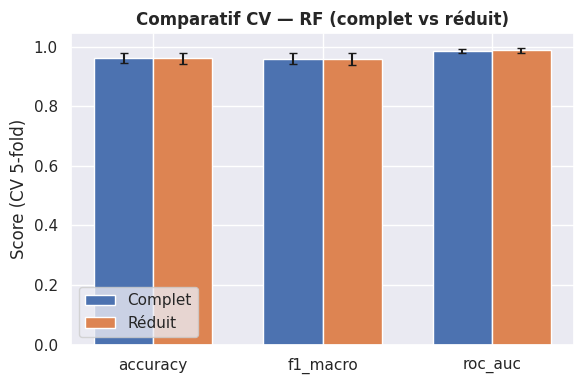

In [162]:
from sklearn.model_selection import StratifiedKFold, cross_validate

#  1) Un SEUL split pour une comparaison équitable
from sklearn.pipeline import Pipeline
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, stratify=y
)

# 1) Définir un estimateur commun (mêmes hyperparams pour l’équité)
rf = RandomForestClassifier(
    n_estimators=300, random_state=10, n_jobs=-1, class_weight="balanced"
)

# 2) Deux pipelines (identiques, sauf l’espace de features)
pipe_full = Pipeline([("rf", rf)])
pipe_red  = Pipeline([("rf", rf)])

# 3) Même schéma de CV pour les deux (mêmes folds => comparaison appariée)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "roc_auc":  "roc_auc",   # binaire
}

X1_train = X_train_full[X1.columns]
X1_test  = X_test_full[X1.columns]
# 4) CV sur le modèle COMPLET
cv_full = cross_validate(
    pipe_full, X_train_full, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 5) CV sur le modèle RÉDUIT
cv_red = cross_validate(
    pipe_red, X1_train, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 6) Résumé comparatif (moyenne ± écart-type)
summary = pd.DataFrame({
    "metric": ["accuracy", "f1_macro", "roc_auc"],
    "full_mean":  [cv_full["test_accuracy"].mean(), cv_full["test_f1_macro"].mean(), cv_full["test_roc_auc"].mean()],
    "full_std":   [cv_full["test_accuracy"].std(),  cv_full["test_f1_macro"].std(),  cv_full["test_roc_auc"].std()],
    "red_mean":   [cv_red["test_accuracy"].mean(),  cv_red["test_f1_macro"].mean(),  cv_red["test_roc_auc"].mean()],
    "red_std":    [cv_red["test_accuracy"].std(),   cv_red["test_f1_macro"].std(),   cv_red["test_roc_auc"].std()],
})
print(" Performance CV (5-fold) — moyenne ± écart-type")
display(summary.round(4))

# 7) Visualisation simple
metrics = ["accuracy", "f1_macro", "roc_auc"]
x = np.arange(len(metrics))
w = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - w/2, summary["full_mean"], yerr=summary["full_std"], width=w, label="Complet", capsize=3)
plt.bar(x + w/2, summary["red_mean"],  yerr=summary["red_std"],  width=w, label="Réduit",  capsize=3)
plt.xticks(x, metrics)
plt.ylabel("Score (CV 5-fold)")
plt.title("Comparatif CV — RF (complet vs réduit)")
plt.legend()
plt.tight_layout()
plt.show()



À travers cette synthèse, on constate que le **modèle réduit présente des performances très solides**, se situant **au niveau du modèle complet** malgré un nombre de variables significativement inférieur.
Ce résultat valide **en partie la pertinence de la sélection des variables**, puisqu’un modèle moins complexe parvient à générer des performances presque équivalentes, voire plus stables.

Cette observation renforce l’idée que **la réduction dimensionnelle ne dégrade pas nécessairement la performance prédictive**, mais peut au contraire **améliorer la généralisation et l’interprétabilité** du modèle.

Dans la continuité, il sera pertinent de **raffiner davantage le modèle** à l’aide :

* d’une **validation croisée stratifiée** afin d’évaluer la robustesse sur plusieurs partitions,
* et d’une **optimisation avancée des hyperparamètres**, notamment via des approches **bayésiennes (Optuna, Hyperopt, ou BayesianOptimization)** permettant une recherche plus efficace dans l’espace des paramètres.

Avant cela, nous allons **explorer d’autres méthodes de sélection de variables**, en commençant par la **sélection univariée** (*Test de Kruskall_Wallis* et la  *Mutual Information*).
L’objectif est de **comparer les approches statistiques indépendantes du modèle** avec celles déjà testées (corrélation, importance de variables) afin de **valider la stabilité du sous-ensemble de features retenu**.



In [70]:
# from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import make_scorer, f1_score
# import numpy as np

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)
# scorer = make_scorer(f1_score, average="macro")

# param_dist = {
#     "n_estimators": [300, 500, 1000],
#     "max_depth": [6, 8, 12],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "max_features": ["sqrt", "log2", 0.5, 0.8],
#     "class_weight": ["balanced"]
# }

# rf = RandomForestClassifier(random_state=10, n_jobs=-1)
# search_red = RandomizedSearchCV(rf, param_distributions=param_dist, cv=cv, scoring=scorer,
#                                 random_state=10, n_jobs=-1, verbose=1)
# search_red.fit(X1, y1)
# print("Best (réduit):", search_red.best_score_, search_red.best_params_)


In [71]:

from scipy.stats import kruskal

### Fonction non sur mésure elle peut etre réutilisables

def kruskal_feature_test(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    """
    Applique le test de Kruskal-Wallis pour chaque variable numérique de X
    selon les groupes de y.

    Retourne un DataFrame avec la statistique H et la p-value.
    """
    results = []
    classes = np.unique(y)

    for col in X.select_dtypes(include=[np.number]).columns:
        # Créer des sous-échantillons par classe
        groups = [X.loc[y == c, col].dropna() for c in classes]

        # Vérifier que chaque classe a au moins 5 observations
        if any(len(g) < 5 for g in groups):
            continue

        try:
            H, p = kruskal(*groups)
            results.append({"Variable": col, "H_statistic": H, "p_value": p})
        except Exception as e:
            results.append({"Variable": col, "H_statistic": np.nan, "p_value": np.nan})

    df_krus = pd.DataFrame(results).dropna().sort_values("p_value", ascending=True)
    # j'ai choisie un risque alpha de 1% pour affiné le test
    df_krus["Significatif (p<0.01)"] = df_krus["p_value"] < 0.01
    return df_krus.reset_index(drop=True)


df_krus = kruskal_feature_test(X, y)
display(df_krus.head(10))


,Variable,H_statistic,p_value,Significatif (p<0.01)
0,worst perimeter,360.182039,2.570073e-80,True
1,worst radius,352.636180,1.130005e-78,True
2,worst area,351.713900,1.794388e-78,True
3,worst concave points,347.055722,1.854836e-77,True
4,mean concave points,343.693024,1.001402e-76,True
5,mean perimeter,318.219885,3.537140e-71,True
6,mean area,306.115524,1.532670e-68,True
7,mean concavity,305.436576,2.154564e-68,True
8,mean radius,305.001142,2.680529e-68,True
9,area error,289.713161,5.741904e-65,True


In [72]:
# # # ---------------------------------------------------
# # # 0) Préparation : X (complet), X1 (réduit), y
# # # X1 est un sous-ensemble de colonnes de X
# # #-----------------------------------------------------

# # # 1) Un SEUL split pour une comparaison équitable
# X_train_full, X_test_full, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=10, stratify=y
# )

# # # Aligner les colonnes réduites sur les mêmes lignes
# # X_train_red = X_train_full[X2]
# # X_test_red  = X_test_full[X2]

# # # 2) Deux modèles séparés (pour éviter d’écraser le même objet)
# rf_full = RandomForestClassifier(
#     n_estimators=300, random_state=10, n_jobs=-1, class_weight="balanced"
# )
# rf_red = RandomForestClassifier(
#     n_estimators=300, random_state=10, n_jobs=-1, class_weight="balanced"
# # )

# # rf_full.fit(X_train_full, y_train)
# # rf_red.fit(X_train_red,  y_train)

# # y_pred_full = rf_full.predict(X_test_full)
# # y_pred_red  = rf_red.predict(X_test_red)





# # #Évaluation

# # evaluate(y_test, y_pred_full,
# #          name="Random Forest — modèle COMPLET (toutes les variables)")
# # evaluate(y_test, y_pred_red,
# #          name="Random Forest — modèle RÉDUIT (features sélectionnées)")


# # imp_full = pd.Series(rf_full.feature_importances_, index=X_train_full.columns) \
# #             .sort_values(ascending=False)
# # imp_red  = pd.Series(rf_red.feature_importances_,  index=X_train_red.columns) \
# #             .sort_values(ascending=False)

# # print("--"*40)
# # print("Top-10 importances (modèle COMPLET)")
# # print(imp_full.head(10))
# # print("--"*40)
# # print("Importances (modèle RÉDUIT a 10 variables)")
# # print(imp_red)


 Performance CV (5-fold) — moyenne ± écart-type


,metric,full_mean,full_std,red_mean,red_std
0,accuracy,0.9626,0.0164,0.9582,0.0146
1,f1_macro,0.9596,0.0178,0.9552,0.0156
2,roc_auc,0.9853,0.0080,0.9842,0.0094


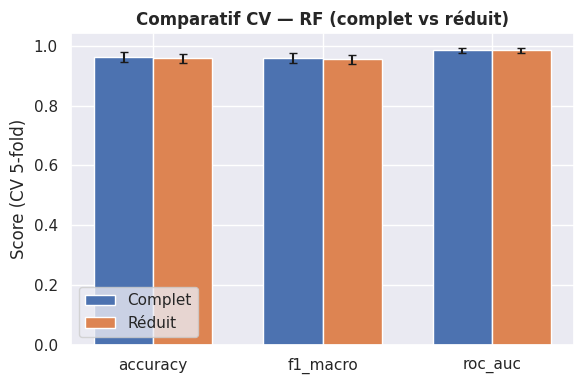

In [73]:



cv_full = cross_validate(
    pipe_full, X_train_full, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)
# # Aligner les colonnes réduites sur les mêmes lignes
X2 = df[df_krus.loc[0:10, "Variable"].tolist() ]
X2_train = X_train_full[X2.columns]
X2_test  = X_test_full[X2.columns]

#  CV sur le modèle RÉDUIT
cv_red = cross_validate(
    pipe_red, X2_train, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 6) Résumé comparatif (moyenne ± écart-type)
summary = pd.DataFrame({
    "metric": ["accuracy", "f1_macro", "roc_auc"],
    "full_mean":  [cv_full["test_accuracy"].mean(), cv_full["test_f1_macro"].mean(), cv_full["test_roc_auc"].mean()],
    "full_std":   [cv_full["test_accuracy"].std(),  cv_full["test_f1_macro"].std(),  cv_full["test_roc_auc"].std()],
    "red_mean":   [cv_red["test_accuracy"].mean(),  cv_red["test_f1_macro"].mean(),  cv_red["test_roc_auc"].mean()],
    "red_std":    [cv_red["test_accuracy"].std(),   cv_red["test_f1_macro"].std(),   cv_red["test_roc_auc"].std()],
})
print(" Performance CV (5-fold) — moyenne ± écart-type")
display(summary.round(4))

# 7) Visualisation simple
metrics = ["accuracy", "f1_macro", "roc_auc"]
x = np.arange(len(metrics))
w = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - w/2, summary["full_mean"], yerr=summary["full_std"], width=w, label="Complet", capsize=3)
plt.bar(x + w/2, summary["red_mean"],  yerr=summary["red_std"],  width=w, label="Réduit",  capsize=3)
plt.xticks(x, metrics)
plt.ylabel("Score (CV 5-fold)")
plt.title("Comparatif CV — RF (complet vs réduit)")
plt.legend()
plt.tight_layout()
plt.show()



En se basant uniquement sur les variables sélectionnées de manière empirique à l’aide du test de Kruskal-Wallis (10 variables ), on observe des performances comparables à celles du modèle complet (29 variables). En effet, les deux modèles présentent une précision supérieure à 95 % et un score F1-macro ≥ 95 %, attestant de la robustesse de la sélection de variables réalisée.

In [74]:
# select_feature = SelectKBest(chi2, k=5).fit(X1_train, y1_train)
# x_train_2 = select_feature.transform(X1_train)
# x_test_2 = select_feature.transform(X1_test)
# #random forest classifier with n_estimators=10 (default)
# clf_rf_2 = RandomForestClassifier()
# clr_rf_2 = clf_rf_2.fit(x_train_2,y1_train)
# ac_2 = accuracy_score(y1_test,clf_rf_2.predict(x_test_2))
# print('Accuracy is: ',ac_2)
# cm_2 = confusion_matrix(y1_test,clf_rf_2.predict(x_test_2))
# sns.heatmap(cm_2,annot=True,fmt="d")
# plt.title('Confusion Matrix')
# plt.show()

Nous allons à présent utiliser SelectKBest avec un critère de Mutual Information (MI) afin de sélectionner les K variables présentant la plus forte dépendance linéaire ou non linéaire avec la variable cible.

Bien que le critère $\chi^2$ (chi-deux) puisse également être utilisé pour la sélection, il convient de rappeler qu’il est principalement adapté aux variables catégorielles (ou aux variables continues préalablement discrétisées).
Il est donc important de vérifier la cohérence entre les variables retenues par la MI et celles jugées importantes par le modèle de Random Forest, afin de s’assurer que la sélection reflète bien les relations pertinente



Nous allons tout d’abord sélectionner les K = 5 meilleures variables à l’aide du critère choisi, puis évaluer les performances du modèle par validation croisée, afin d’éviter toute fuite de données (data leakage).
Par la suite, la même procédure sera répétée pour K = 10 et K = 15, afin d’observer l’évolution des performances en fonction du nombre de variables retenues.

L’objectif est de réduire la complexité du modèle en conservant uniquement un sous-ensemble pertinent de variables

c’est-à-dire avec K < nombre total de variables du jeu de données tout en maintenant un bon niveau de performance et une interprétabilité satisfaisante du modèle.


 Performance CV (5-fold) — moyenne ± écart-type


,metric,full_mean,full_std,red_mean,red_std
0,accuracy,0.9626,0.0164,0.9451,0.0209
1,f1_macro,0.9596,0.0178,0.9414,0.0222
2,roc_auc,0.9853,0.0080,0.9844,0.0101


les variables retenues sont :  Index(['mean area', 'mean concave points', 'area error', 'worst area',
       'worst concave points'],
      dtype='object')


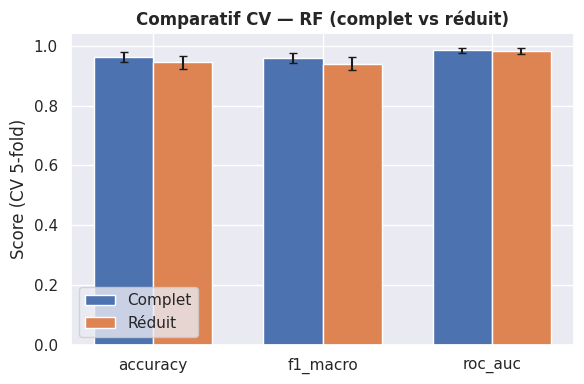

In [163]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

select_feature_1 = SelectKBest(mutual_info_classif, k=5).fit(X1_train, y_train)



X1_train_kbest = select_feature_1.transform(X1_train)


cv_full = cross_validate(
    pipe_full, X_train_full, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 5) CV sur le modèle RÉDUIT
cv_red = cross_validate(
    pipe_red, X1_train_kbest, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 6) Résumé comparatif (moyenne ± écart-type)
summary = pd.DataFrame({
    "metric": ["accuracy", "f1_macro", "roc_auc"],
    "full_mean":  [cv_full["test_accuracy"].mean(), cv_full["test_f1_macro"].mean(), cv_full["test_roc_auc"].mean()],
    "full_std":   [cv_full["test_accuracy"].std(),  cv_full["test_f1_macro"].std(),  cv_full["test_roc_auc"].std()],
    "red_mean":   [cv_red["test_accuracy"].mean(),  cv_red["test_f1_macro"].mean(),  cv_red["test_roc_auc"].mean()],
    "red_std":    [cv_red["test_accuracy"].std(),   cv_red["test_f1_macro"].std(),   cv_red["test_roc_auc"].std()],
})
print(" Performance CV (5-fold) — moyenne ± écart-type")
display(summary.round(4))
print("les variables retenues sont : ",X1.columns[select_feature_1.get_support()])

# 7) Visualisation simple
metrics = ["accuracy", "f1_macro", "roc_auc"]
x = np.arange(len(metrics))
w = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - w/2, summary["full_mean"], yerr=summary["full_std"], width=w, label="Complet", capsize=3)
plt.bar(x + w/2, summary["red_mean"],  yerr=summary["red_std"],  width=w, label="Réduit",  capsize=3)
plt.xticks(x, metrics)
plt.ylabel("Score (CV 5-fold)")
plt.title("Comparatif CV — RF (complet vs réduit)")
plt.legend()
plt.tight_layout()
plt.show()



 Performance CV (5-fold) — moyenne ± écart-type


,metric,full_mean,full_std,red_mean,red_std
0,accuracy,0.9626,0.0164,0.9538,0.0176
1,f1_macro,0.9596,0.0178,0.9505,0.0189
2,roc_auc,0.9853,0.0080,0.9892,0.0074


les variables retenues sont :  Index(['mean texture', 'mean area', 'mean concave points', 'mean symmetry',
       'area error', 'concave points error', 'worst area', 'worst smoothness',
       'worst concave points', 'worst symmetry'],
      dtype='object')


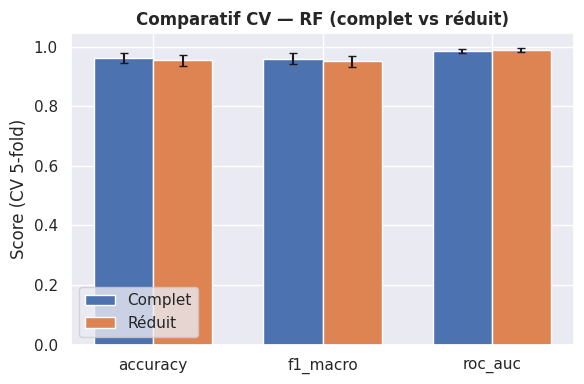

In [80]:
select_feature_1 = SelectKBest(mutual_info_classif, k=10).fit(X1_train, y_train)



X1_train_kbest = select_feature_1.transform(X1_train)


cv_full = cross_validate(
    pipe_full, X_train_full, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 5) CV sur le modèle RÉDUIT
cv_red = cross_validate(
    pipe_red, X1_train_kbest, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 6) Résumé comparatif (moyenne ± écart-type)
summary = pd.DataFrame({
    "metric": ["accuracy", "f1_macro", "roc_auc"],
    "full_mean":  [cv_full["test_accuracy"].mean(), cv_full["test_f1_macro"].mean(), cv_full["test_roc_auc"].mean()],
    "full_std":   [cv_full["test_accuracy"].std(),  cv_full["test_f1_macro"].std(),  cv_full["test_roc_auc"].std()],
    "red_mean":   [cv_red["test_accuracy"].mean(),  cv_red["test_f1_macro"].mean(),  cv_red["test_roc_auc"].mean()],
    "red_std":    [cv_red["test_accuracy"].std(),   cv_red["test_f1_macro"].std(),   cv_red["test_roc_auc"].std()],
})
print(" Performance CV (5-fold) — moyenne ± écart-type")
display(summary.round(4))
print("les variables retenues sont : ",X1.columns[select_feature_1.get_support()])

# 7) Visualisation simple
metrics = ["accuracy", "f1_macro", "roc_auc"]
x = np.arange(len(metrics))
w = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - w/2, summary["full_mean"], yerr=summary["full_std"], width=w, label="Complet", capsize=3)
plt.bar(x + w/2, summary["red_mean"],  yerr=summary["red_std"],  width=w, label="Réduit",  capsize=3)
plt.xticks(x, metrics)
plt.ylabel("Score (CV 5-fold)")
plt.title("Comparatif CV — RF (complet vs réduit)")
plt.legend()
plt.tight_layout()
plt.show()



 Performance CV (5-fold) — moyenne ± écart-type


,metric,full_mean,full_std,red_mean,red_std
0,accuracy,0.9626,0.0164,0.9560,0.0197
1,f1_macro,0.9596,0.0178,0.9527,0.0211
2,roc_auc,0.9853,0.0080,0.9886,0.0069


les variables retenues sont :  Index(['mean texture', 'mean area', 'mean smoothness', 'mean concave points',
       'mean symmetry', 'mean fractal dimension', 'area error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst area', 'worst smoothness', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')


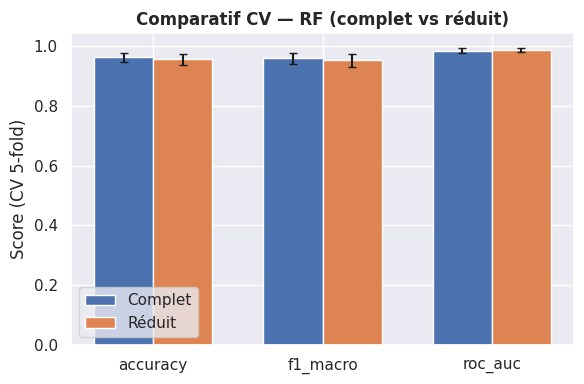

In [164]:
select_feature_1 = SelectKBest(mutual_info_classif, k=15).fit(X1_train, y_train)



X1_train_kbest = select_feature_1.transform(X1_train)


cv_full = cross_validate(
    pipe_full, X_train_full, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 5) CV sur le modèle RÉDUIT
cv_red = cross_validate(
    pipe_red, X1_train_kbest, y_train, cv=cv, scoring=scoring, return_estimator=False, n_jobs=-1
)

# 6) Résumé comparatif (moyenne ± écart-type)
summary = pd.DataFrame({
    "metric": ["accuracy", "f1_macro", "roc_auc"],
    "full_mean":  [cv_full["test_accuracy"].mean(), cv_full["test_f1_macro"].mean(), cv_full["test_roc_auc"].mean()],
    "full_std":   [cv_full["test_accuracy"].std(),  cv_full["test_f1_macro"].std(),  cv_full["test_roc_auc"].std()],
    "red_mean":   [cv_red["test_accuracy"].mean(),  cv_red["test_f1_macro"].mean(),  cv_red["test_roc_auc"].mean()],
    "red_std":    [cv_red["test_accuracy"].std(),   cv_red["test_f1_macro"].std(),   cv_red["test_roc_auc"].std()],
})
print(" Performance CV (5-fold) — moyenne ± écart-type")
display(summary.round(4))
print("les variables retenues sont : ",X1.columns[select_feature_1.get_support()])

# 7) Visualisation simple
metrics = ["accuracy", "f1_macro", "roc_auc"]
x = np.arange(len(metrics))
w = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - w/2, summary["full_mean"], yerr=summary["full_std"], width=w, label="Complet", capsize=3)
plt.bar(x + w/2, summary["red_mean"],  yerr=summary["red_std"],  width=w, label="Réduit",  capsize=3)
plt.xticks(x, metrics)
plt.ylabel("Score (CV 5-fold)")
plt.title("Comparatif CV — RF (complet vs réduit)")
plt.legend()
plt.tight_layout()
plt.show()



In [182]:
X_train_sel_k10=X_train_full[['mean texture', 'mean area', 'mean concave points', 'mean symmetry',
       'area error', 'concave points error', 'worst area', 'worst smoothness',
       'worst concave points', 'worst symmetry']]

Les résultats montrent que le modèle Random Forest conserve des performances stables et élevées, même après une réduction importante du nombre de variables grâce à la sélection univariée basée sur la Mutual Information (MI).
Avec seulement 5 à 15 variables, la précision moyenne (accuracy) dépasse déjà 94 %, ce qui met en évidence la forte capacité discriminante d’un petit sous-ensemble de descripteurs morphologiques.

L’ajout de variables supplémentaires, jusqu’à K = 15, n’apporte qu’un gain marginal (+1,09 % en précision), non significatif statistiquement. Cela confirme que l’essentiel de l’information prédictive est concentré dans un noyau restreint de caractéristiques pertinentes.

Il est par ailleurs intéressant d’observer que pour K = 10, les performances présentent une variabilité plus faible et une légère amélioration globale par rapport à K = 5 (+0,8 % en précision et +0,91 % sur le score F1-macro).

Ainsi, pour un compromis optimal entre performance et interprétabilité, le modèle réduit à K = 10 variables constitue une solution robuste, fiable et explicable, apte à être privilégiée pour les analyses ultérieures.

---
Après la sélection univariée, nous passons à une approche plus exhaustive (approche multivariée) avec RFECV, qui permet d’identifier récursivement les variables les plus pertinentes tout en validant la performance du modèle à chaque étape

### RFECV

RFECV (Recursive Feature Elimination with Cross-Validation ) est une méthode qui
élimine les caractéristiques de manière récursives avec validation croisée pour sélectionner les caractéristiques.

Nombre optimal de variables : 15
 Variables retenues : ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points']


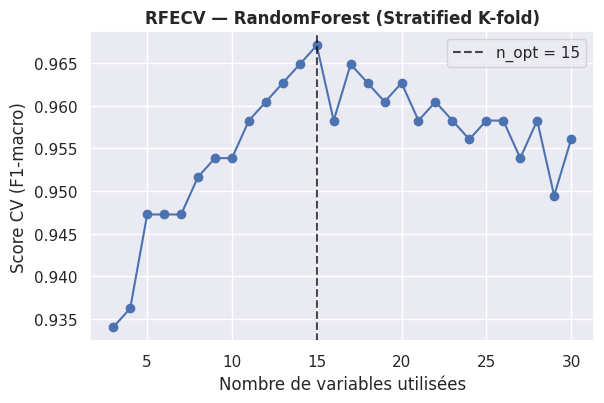

Score CV max = 0.96703
n_features_ (choisi par RFECV) = 15
Accuracy CV moyenne: 0.9648 ± 0.0128
Top importances (modèle final) :


,importance
mean concave points,0.155766
worst perimeter,0.153111
worst area,0.141865
worst concave points,0.120881
worst radius,0.119799
mean perimeter,0.056512
mean concavity,0.055240
mean area,0.039416
worst concavity,0.033426
mean radius,0.032270


In [172]:
# Sélection récursive avec validation croisée (RFECV) + Random Forest

# 1) Définir la CV stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# # 2) Définir l’estimateur (RF) pour RFECV
rf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=10,
    n_jobs=-1,
    class_weight="balanced"
)

# 3) RFECV : sélection récursive avec CV stratifiée
rfecv = RFECV(
    estimator=rf_base,
    step=1,                       # 1 = plus précis, plus lent ; 2 ou 3 accélèrent
    cv=cv,
    scoring="accuracy",
    min_features_to_select=3,
    n_jobs=-1
)

rfecv.fit(X_train_full, y_train)
n_opt = rfecv.n_features_
support_mask = rfecv.support_
ranking = rfecv.ranking_
selected_features = X_train_full.columns[support_mask].tolist()

print("Nombre optimal de variables :", n_opt)
print(" Variables retenues :", selected_features)

if hasattr(rfecv, "cv_results_"):
    scores = rfecv.cv_results_["mean_test_score"]
    start = rfecv.min_features_to_select
    nfeats = np.arange(start, start + len(scores))
else:
    scores = rfecv.grid_scores_
    start = getattr(rfecv, "min_features_to_select", 1)
    nfeats = np.arange(start, start + len(scores))


# 3) graphe
plt.figure(figsize=(6.2,4.2))
plt.plot(nfeats, scores, marker="o")
plt.axvline(rfecv.n_features_, ls="--", alpha=0.7, label=f"n_opt = {rfecv.n_features_}",color="black")
plt.xlabel("Nombre de variables utilisées")
plt.ylabel("Score CV (F1-macro)")
plt.title("RFECV — RandomForest (Stratified K-fold)")
plt.legend()
plt.tight_layout()
plt.show()

# 4)
best = np.max(scores)
candidats = nfeats[np.isclose(scores, best, rtol=1e-6, atol=1e-12)]
print(f"Score CV max = {best:.5f}")
# print(f"Nombres de variables donnant le score max : {sorted(set(candidats))}")
print(f"n_features_ (choisi par RFECV) = {rfecv.n_features_}")




# 6) Entraîner un RF FINAL sur les variables sélectionnées
X_train_sel = X_train_full[selected_features]
X_test_sel  = X_test_full[selected_features]

rf_final = RandomForestClassifier(
    n_estimators=500,
    random_state=10,
    n_jobs=-1,
    class_weight="balanced",
    max_depth=None
)
rf_final.fit(X_train_sel, y_train)

# 7) Évaluation sur le train (validations croisé)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_final, X_train_full[selected_features], y_train,
    cv=cv, scoring="accuracy", n_jobs=-1
)
print(f"Accuracy CV moyenne: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



# 8) Importances (sur le modèle final)
imp = pd.Series(rf_final.feature_importances_, index=selected_features).sort_values(ascending=False)
print("Top importances (modèle final) :")
display(imp.to_frame("importance").head(15))

In [179]:
X_train_sel_rfcv = X_train_full[rfecv.get_feature_names_out()]
X_train_sel_rfcv.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'radius error', 'area error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst concavity', 'worst concave points'],
      dtype='object')

Avec la méthode de sélection récursive RFECV, le modèle retient 15 variables jugées les plus pertinentes.
Cette sélection a été effectuée sur un modèle de Random Forest, et le modèle obtenu atteint une précision moyenne de 96,48 %, avec un écart-type de 0,0128 sur la validation croisée.

On observe ainsi une amélioration de +0,88 %  de la précision et une baisse de l'ecart type de 0.0096 par rapport à la sélection univariée basée sur Mutual Information (pour k = 15), et une hausse de +1,1 % par rapport au modèle complet à k = 5 et une baisse de0.0048  de l'ecart type  

Ces résultats suggèrent que la sélection récursive RFECV permet de construire un modèle plus performant et plus stable, tout en réduisant la redondance entre variables et en optimisant la capacité généralisatrice du Random Forest.



In [111]:
# from sklearn.feature_selection import mutual_info_classif, SelectKBest

# # Sélection des K meilleures features selon leur information mutuelle avec la target
# selector = SelectKBest(score_func=mutual_info_classif, k=5)
# X_selected = selector.fit_transform(X_train_full, y_train)

# # Visualiser les scores
# import pandas as pd
# mi_scores = pd.DataFrame({
#     "Feature": X_train_full.columns,
#     "MI_Score": selector.scores_
# }).sort_values("MI_Score", ascending=False)

# print(mi_scores)
# print("-"*50)
# print("Les variables selectionné sont :\n",selector.get_feature_names_out())



In [149]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier

# pipe = Pipeline([
#     ("scale", MinMaxScaler()),  #  pour normaliser
#     ("mi", SelectKBest(mutual_info_classif, k=10)),
#     ("rf", RandomForestClassifier(random_state=42))
# ])

# # pipe.fit(X_train_full, y_train)

# from sklearn.metrics import make_scorer, f1_score

# # --- 1) Schéma de CV (stratifié) ---
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # --- 2) Métriques d'évaluation ---
# scoring = {
#     "accuracy": "accuracy",
#     "f1_macro": "f1_macro",
#     "roc_auc":  "roc_auc"   # binaire
# }

# # --- 3) Évaluation CV du pipeline sur le TRAIN ---
# cv_res = cross_validate(
#     pipe,
#     X_train_full, y_train,
#     cv=cv,
#     scoring=scoring,
#     n_jobs=-1,
#     return_train_score=False
# )

# # --- 4) Résumé des performances (moyenne ± écart-type) ---
# summary = pd.DataFrame({
#     "metric": ["accuracy", "f1_macro", "roc_auc"],
#     "mean":   [cv_res["test_accuracy"].mean(),
#                cv_res["test_f1_macro"].mean(),
#                cv_res["test_roc_auc"].mean()],
#     "std":    [cv_res["test_accuracy"].std(),
#                cv_res["test_f1_macro"].std(),
#                cv_res["test_roc_auc"].std()],
# })

# print(" Performance CV (5-fold) — moyenne ± écart-type")
# display(summary.round(4))

# # (optionnel) Afficher les scores par fold si besoin
# print("Scores par fold (accuracy):", np.round(cv_res["test_accuracy"], 4))
# print("Scores par fold (f1_macro):", np.round(cv_res["test_f1_macro"], 4))
# print("Scores par fold (roc_auc):",  np.round(cv_res["test_roc_auc"], 4))

# # --- 5) Refit FINAL sur tout le TRAIN pour inspecter les features retenues ---
# pipe.fit(X_train_full, y_train)  # fit unique, après la CV (pas pour évaluer, juste pour introspection)
# mask = pipe.named_steps["mi"].get_support()
# selected_features = X_train_full.columns[mask].tolist()
# print(" Features retenues (MI, k=10) :", selected_features)


 Performance CV (5-fold) — moyenne ± écart-type


,metric,mean,std
0,accuracy,0.9451,0.0197
1,f1_macro,0.9414,0.0206
2,roc_auc,0.9779,0.0168


Scores par fold (accuracy): [0.956  0.9341 0.956  0.967  0.9121]
Scores par fold (f1_macro): [0.953  0.9296 0.9525 0.965  0.9071]
Scores par fold (roc_auc): [0.9827 0.9866 0.9956 0.9781 0.9463]
 Features retenues (MI, k=5) : ['mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']


## Réglage des hyperparamètre

In [122]:
# # OPTUNA — RandomForest + (optionnel) SelectKBest(MI) dans un Pipeline
# # !pip install optuna
# import numpy as np
# import optuna
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_selection import SelectKBest, mutual_info_classif
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold, cross_val_score

# RANDOM_STATE = 42

# def build_pipeline(params, with_feature_selection=False, k_features=5):
#     """Construit un pipeline sans fuite. Activation optionnelle de SelectKBest(MI)."""
#     steps = []
#     if with_feature_selection:
#         steps += [
#             ("scale", MinMaxScaler()),  # utile pour MI
#             ("kbest", SelectKBest(mutual_info_classif, k=k_features)),
#         ]
#     steps += [("rf", RandomForestClassifier(
#         n_estimators=params["n_estimators"],
#         max_depth=params["max_depth"],
#         min_samples_split=params["min_samples_split"],
#         min_samples_leaf=params["min_samples_leaf"],
#         max_features=params["max_features"],
#         bootstrap=params["bootstrap"],
#         class_weight="balanced",
#         n_jobs=-1,
#         random_state=RANDOM_STATE
#     ))]
#     return Pipeline(steps)

# def optuna_objective(trial, X, y, scoring="f1_macro", with_feature_selection=False):
#     # Espace de recherche (robuste et réaliste pour RF)
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 200, 1200, step=50),
#         "max_depth": trial.suggest_int("max_depth", 3, 40),
#         "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
#         "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
#         "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.5, 0.7, None]),
#         "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
#     }

#     # Optionnel : tuner aussi k (nb de features MI)
#     k_features = trial.suggest_int("k_features", 5, 25) if with_feature_selection else 0

#     pipe = build_pipeline(params, with_feature_selection, k_features=k_features)

#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
#     scores = cross_val_score(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)
#     return scores.mean()

# def run_optuna_rf(X, y, with_feature_selection=False, n_trials=50, scoring="f1_macro"):
#     sampler = optuna.samplers.TPESampler(seed=RANDOM_STATE)
#     pruner = optuna.pruners.MedianPruner(n_warmup_steps=10)  # stoppe tôt les essais faibles
#     study = optuna.create_study(direction="maximize", sampler=sampler, pruner=pruner)
#     study.optimize(lambda t: optuna_objective(t, X, y, scoring, with_feature_selection),
#                    n_trials=n_trials, show_progress_bar=True)

#     print(" Best value:", study.best_value)
#     print(" Best params:", study.best_params)

#     # Refit final sur tout le train avec les meilleurs hyperparams
#     best = study.best_params.copy()
#     k_features = best.pop("k_features", 10) if with_feature_selection else 0
#     final_pipe = build_pipeline(best, with_feature_selection, k_features=k_features)
#     final_pipe.fit(X, y)
#     return study, final_pipe

# # --- Utilisation ---
# # Sans sélection de variables
# study_rf, pipe_rf = run_optuna_rf(X_train_full, y_train, with_feature_selection=False, n_trials=80)

# # Avec SelectKBest(mutual_info) (k optimisé aussi)
# study_rf_mi, pipe_rf_mi = run_optuna_rf(X_train_full, y_train, with_feature_selection=True, n_trials=120)


In [183]:
import optuna
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
#  Objectif pour Optuna
def objective_rf_fast(trial, X, y, scoring="f1_macro"):
    # Espace de recherche restreint (mais suffisant pour un bon tuning)
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300, step=50),
        "max_depth": trial.suggest_int("max_depth", 4, 8), #profondeur
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 12),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 6),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.5]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    rf = RandomForestClassifier(
        **params,
        class_weight="balanced",
        n_jobs=-1,
        random_state=RANDOM_STATE
    )

    # Validation croisée rapide (3-fold pour la vitesse)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    return scores.mean()

def tune_rf_fast(X_train_sel, y_train, scoring="accuracy", n_trials=25):
    """
    Version rapide d'Optuna pour tuner un RandomForest sans faire un entraînement long.
    """
    sampler = optuna.samplers.TPESampler(seed=RANDOM_STATE)
    study = optuna.create_study(direction="maximize", sampler=sampler)
    study.optimize(lambda t: objective_rf_fast(t, X_train_sel, y_train, scoring),
                   n_trials=n_trials, show_progress_bar=True)

    print("\n Score CV moyen (meilleur essai) :", round(study.best_value, 4))
    print(" Paramètres optimaux :", study.best_params)

    # Entraînement final (fit complet)
    best_params = study.best_params
    rf_final = RandomForestClassifier(
        **best_params,
        class_weight="balanced",
        n_jobs=-1,
        random_state=RANDOM_STATE
    )
    rf_final.fit(X_train_sel, y_train)
    return study, rf_final



In [184]:
study_fast, rf_fast = tune_rf_fast(X_train_sel_k10, y_train, scoring="accuracy", n_trials=50)


[I 2025-10-26 16:28:18,693] A new study created in memory with name: no-name-5e55946a-833b-42ab-99c5-685ae3b50413


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-26 16:28:25,711] Trial 0 finished with value: 0.9472086673637737 and parameters: {'n_estimators': 150, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.9472086673637737.
[I 2025-10-26 16:28:27,936] Trial 1 finished with value: 0.942822702451493 and parameters: {'n_estimators': 250, 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.9472086673637737.
[I 2025-10-26 16:28:29,517] Trial 2 finished with value: 0.9450156849076333 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.5, 'bootstrap': True}. Best is trial 0 with value: 0.9472086673637737.
[I 2025-10-26 16:28:30,951] Trial 3 finished with value: 0.9383931683513419 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0

In [470]:
params ={'n_estimators': 150, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}
rf_fast1 = RandomForestClassifier(**params, class_weight="balanced", n_jobs=-1, random_state=RANDOM_STATE)
Cv_auc = cross_val_score(rf_fast1, X_train_sel_k10, y_train, cv=cv , scoring="roc_auc", n_jobs=-1)
Cv_f1 = cross_val_score(rf_fast1, X_train_sel_k10, y_train, cv=cv , scoring="f1_macro",n_jobs=-1)
print("AUC moyenne :", round(Cv_auc.mean(),4))
print("F1-macro moyenne :", round(Cv_f1.mean(),4))



AUC moyenne : 0.9895
F1-macro moyenne : 0.9484


In [185]:
study_fast, rf_fast = tune_rf_fast(X_train_sel_rfcv, y_train, scoring="accuracy", n_trials=50)


[I 2025-10-26 16:29:28,665] A new study created in memory with name: no-name-51a47c00-5d67-4c14-93c5-59001f9abc9d


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-26 16:29:29,978] Trial 0 finished with value: 0.9494016498199139 and parameters: {'n_estimators': 150, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.9494016498199139.
[I 2025-10-26 16:29:32,516] Trial 1 finished with value: 0.9538021377948183 and parameters: {'n_estimators': 250, 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.9538021377948183.
[I 2025-10-26 16:29:34,096] Trial 2 finished with value: 0.9450011618450098 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.5, 'bootstrap': True}. Best is trial 1 with value: 0.9538021377948183.
[I 2025-10-26 16:29:35,654] Trial 3 finished with value: 0.9449866387823865 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 

#### Recherche aléatoire

Fitting 3 folds for each of 30 candidates, totalling 90 fits
 Best params: {'bootstrap': True, 'ccp_alpha': np.float64(0.00352568856334169), 'class_weight': None, 'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 103, 'max_samples': np.float64(0.8136357677501768), 'min_impurity_decrease': np.float64(0.0009696599427179664), 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 383}
 Best CV score: 0.953

Meilleurs hyperparamètres :
  - bootstrap: True
  - ccp_alpha: 0.00352568856334169
  - class_weight: None
  - max_depth: 12
  - max_features: log2
  - max_leaf_nodes: 103
  - max_samples: 0.8136357677501768
  - min_impurity_decrease: 0.0009696599427179664
  - min_samples_leaf: 2
  - min_samples_split: 6
  - n_estimators: 383

Scores CV (moyenne sur folds) du meilleur modèle (refit sur f1_macro) :
  - accuracy: 0.9560
  - f1_macro: 0.9530
  - roc_auc: 0.9871


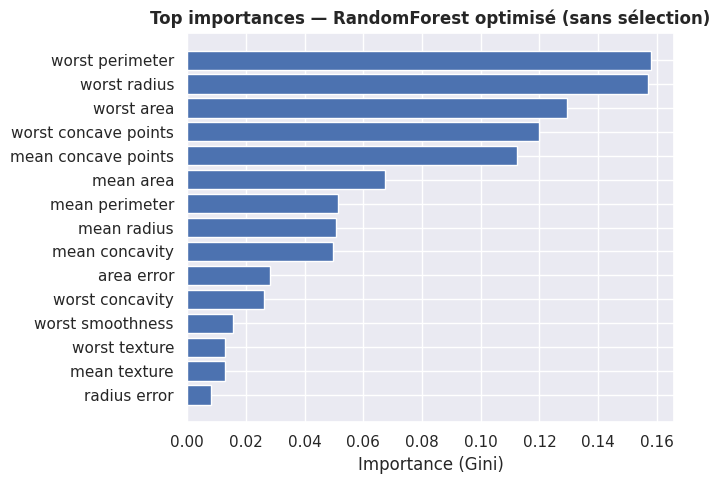

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# 1) Modèle de base
rf = RandomForestClassifier(
    n_jobs=-1,
    random_state=42
)
scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "roc_auc": "roc_auc"
}
# 2) Espace de recherche (sobre mais efficace)
param_distributions = {
    "n_estimators": randint(100, 300),      # stabilité ↑ avec le nombre d’arbres
    "max_depth": randint(3, 10),
    "min_samples_split": randint(2, 14),
    "min_samples_leaf": randint(4, 10),
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7],  # mélange cat. + ratios
    "bootstrap": [True, False],
    "class_weight": [None, "balanced"],      # utile si classes déséquilibrées
}

# 3) Stratégie de validation et métriques
from scipy.stats import randint, uniform
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Estimator de base "sobre"
rf_base = RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
    # on ne fixe PAS class_weight ici, on le laisse être tuné ci-dessous
)

# Espace "stabilité d'abord" (anti-overfit)
param_distributions = {
    # Forêt raisonnable (assez d’arbres pour la stabilité, sans exagérer)
    "n_estimators": randint(150, 400),

    # Limiter la profondeur et augmenter légèrement les seuils de scission/feuilles
    "max_depth": randint(6, 18),              # arbres moins profonds → variance ↓
    "min_samples_split": randint(4, 16),      # coupes moins agressives
    "min_samples_leaf": randint(2, 8),        # feuilles plus grosses → lissage

    # Sous-échantillonnage de features à chaque split (réduit corrélation entre arbres)
    "max_features": ["sqrt", "log2", 0.3, 0.5],

    # Bootstrap + sous-échantillonnage d’échantillons (bagging “fort”)
    "bootstrap": [True],
    "max_samples": uniform(0.6, 0.4),  # fraction ∈ [0.6, 1.0] si bootstrap=True

    # Gestion du déséquilibre (à garder si tes classes sont déséquilibrées)
    "class_weight": [None, "balanced"],

    # Pruning léger des arbres (régularisation structurelle)
    "ccp_alpha": uniform(0.0, 0.01),          # coût-complexité (0 = off)
    "min_impurity_decrease": uniform(0.0, 0.002),

    # Optionnel mais utile pour borner la taille
    "max_leaf_nodes": randint(32, 128),
}

# Recherche "rapide mais propre"
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "roc_auc": "roc_auc"
}

search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_distributions,
    n_iter=30,
    scoring=scoring,     # <--- plusieurs métriques
    refit="f1_macro",    # <--- laquelle on utilise pour le refit final
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)



# Entraînement sur ton sous-ensemble sélectionné
search.fit(X_train_sel_rfcv, y_train)

print(" Best params:", search.best_params_)
print(" Best CV score:", round(search.best_score_, 4))

# Modèle final (refit automatique sur tout X_train_sel)
# rf_final = search.best_estimator_


# 6) Résumé des meilleurs résultats
best_rf = search.best_estimator_
best_params = search.best_params_
best_scores = {m: search.cv_results_[f"mean_test_{m}"][search.best_index_] for m in scoring}

print("\nMeilleurs hyperparamètres :")
for k, v in best_params.items():
    print(f"  - {k}: {v}")

print("\nScores CV (moyenne sur folds) du meilleur modèle (refit sur f1_macro) :")
for m, s in best_scores.items():
    print(f"  - {m}: {s:.4f}")



# 7) Importances de variables (Gini)
importances = best_rf.feature_importances_
order = np.argsort(importances)[::-1]
names = np.array(X_train_sel_rfcv.columns)
plt.figure(figsize=(7, 5))
plt.barh(range(min(20, len(order))), importances[order][:20][::-1])
plt.yticks(range(min(20, len(order))), names[order][:20][::-1])
plt.xlabel("Importance (Gini)")
plt.title("Top importances — RandomForest optimisé (sans sélection)")
plt.tight_layout()
plt.show()




In [500]:
# params ={'bootstrap': True, 'ccp_alpha': np.float64(0.00352568856334169), 'class_weight': None, 'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 103, 'max_samples': np.float64(0.8136357677501768), 'min_impurity_decrease': np.float64(0.0009696599427179664), 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 383}
# rf_k15 = RandomForestClassifier(**params, n_jobs=-1, random_state=RANDOM_STATE)
best_rf_k15 =rf_k15.fit(X_train_sel_rfcv, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
 Best params: {'bootstrap': True, 'ccp_alpha': np.float64(0.00352568856334169), 'class_weight': None, 'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 103, 'max_samples': np.float64(0.8136357677501768), 'min_impurity_decrease': np.float64(0.0009696599427179664), 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 383}
 Best CV score: 0.9506

Meilleurs hyperparamètres :
  - bootstrap: True
  - ccp_alpha: 0.00352568856334169
  - class_weight: None
  - max_depth: 12
  - max_features: log2
  - max_leaf_nodes: 103
  - max_samples: 0.8136357677501768
  - min_impurity_decrease: 0.0009696599427179664
  - min_samples_leaf: 2
  - min_samples_split: 6
  - n_estimators: 383

Scores CV (moyenne sur folds) du meilleur modèle (refit sur f1_macro) :
  - accuracy: 0.9538
  - f1_macro: 0.9506
  - roc_auc: 0.9854


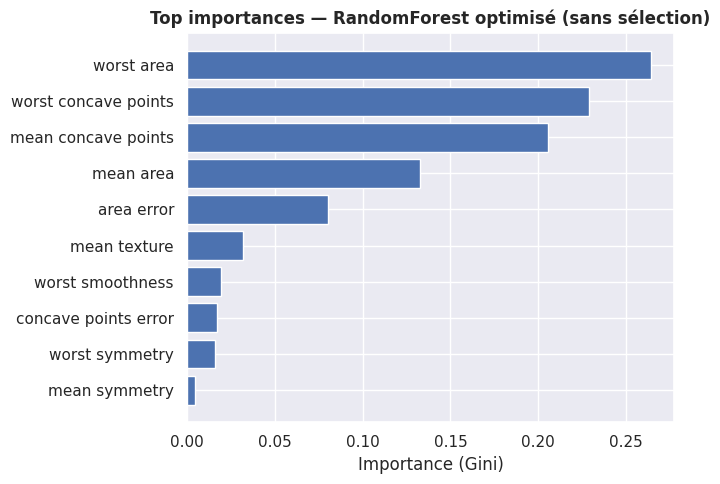

In [215]:


# 1) Modèle de base
rf = RandomForestClassifier(
    n_jobs=-1,
    random_state=42
)
scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "roc_auc": "roc_auc"
}
# 2) Espace de recherche (sobre mais efficace)
param_distributions = {
    "n_estimators": randint(100, 300),      # stabilité ↑ avec le nombre d’arbres
    "max_depth": randint(3, 10),
    "min_samples_split": randint(2, 14),
    "min_samples_leaf": randint(4, 10),
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7],  # mélange cat. + ratios
    "bootstrap": [True, False],
    "class_weight": [None, "balanced"],      # utile si classes déséquilibrées
}

# 3) Stratégie de validation et métriques
from scipy.stats import randint, uniform
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Estimator de base "sobre"
rf_base = RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
    # on ne fixe PAS class_weight ici, on le laisse être tuné ci-dessous
)

# Espace "stabilité d'abord" (anti-overfit)
param_distributions = {
    # Forêt raisonnable (assez d’arbres pour la stabilité, sans exagérer)
    "n_estimators": randint(150, 400),

    # Limiter la profondeur et augmenter légèrement les seuils de scission/feuilles
    "max_depth": randint(6, 18),              # arbres moins profonds → variance ↓
    "min_samples_split": randint(4, 16),      # coupes moins agressives
    "min_samples_leaf": randint(2, 8),        # feuilles plus grosses → lissage

    # Sous-échantillonnage de features à chaque split (réduit corrélation entre arbres)
    "max_features": ["sqrt", "log2", 0.3, 0.5],

    # Bootstrap + sous-échantillonnage d’échantillons (bagging “fort”)
    "bootstrap": [True],
    "max_samples": uniform(0.6, 0.4),  # fraction ∈ [0.6, 1.0] si bootstrap=True

    # Gestion du déséquilibre (à garder si tes classes sont déséquilibrées)
    "class_weight": [None, "balanced"],

    # Pruning léger des arbres (régularisation structurelle)
    "ccp_alpha": uniform(0.0, 0.01),          # coût-complexité (0 = off)
    "min_impurity_decrease": uniform(0.0, 0.002),

    # Optionnel mais utile pour borner la taille
    "max_leaf_nodes": randint(32, 128),
}

# Recherche "rapide mais propre"
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "roc_auc": "roc_auc"
}

search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_distributions,
    n_iter=30,
    scoring=scoring,     # <--- plusieurs métriques
    refit="f1_macro",    # <--- laquelle on utilise pour le refit final
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)



# Entraînement sur ton sous-ensemble sélectionné
search.fit(X_train_sel_k10, y_train)

print(" Best params:", search.best_params_)
print(" Best CV score:", round(search.best_score_, 4))

# Modèle final (refit automatique sur tout X_train_sel)
# rf_final = search.best_estimator_


# 6) Résumé des meilleurs résultats
best_rf = search.best_estimator_
best_params = search.best_params_
best_scores = {m: search.cv_results_[f"mean_test_{m}"][search.best_index_] for m in scoring}

print("\nMeilleurs hyperparamètres :")
for k, v in best_params.items():
    print(f"  - {k}: {v}")

print("\nScores CV (moyenne sur folds) du meilleur modèle (refit sur f1_macro) :")
for m, s in best_scores.items():
    print(f"  - {m}: {s:.4f}")

# 7)  Importances de variables (Gini)
importances = best_rf.feature_importances_
order = np.argsort(importances)[::-1]
names = np.array(X_train_sel_k10.columns)  # assurez-vous que X1 est un DataFrame
plt.figure(figsize=(7, 5))
plt.barh(range(min(20, len(order))), importances[order][:20][::-1])
plt.yticks(range(min(20, len(order))), names[order][:20][::-1])
plt.xlabel("Importance (Gini)")
plt.title("Top importances — RandomForest optimisé (sans sélection)")
plt.tight_layout()
plt.show()



In [502]:
# FI_K10 =pd.DataFrame ({"Features importances":best_rf_k15.feature_importances_}, index=X_train_sel_rfcv.columns )
# FI_K15 = pd.DataFrame ({"Features importances":rf_bayes_k10.feature_importances_}, index=X_train_sel_k10.columns)
# Vars_K10 = (FI_K10.sort_values(by="Features importances", ascending=False)[:10]).index
# Vars_K15 = (FI_K15.sort_values(by="Features importances", ascending=False)[:10]).index

# Vars_K15 = Vars_K15.tolist()
# Vars_K10 = Vars_K10.tolist()

# Vars_simili = []
# for var in Vars_K10:
#   if var in Vars_K15:
#     Vars_simili.append(var)

# # Vars_simili
# common_fi = pd.DataFrame({
#     "K10": FI_K10.loc[Vars_simili, "Features importances"],
#     "K15": FI_K15.loc[Vars_simili, "Features importances"]
# }).sort_values("K10", ascending=False)

# plt.figure(figsize=(7,4))
# sns.barplot(data=common_fi, x="K10", y=common_fi.index, color="royalblue", label="K=10")
# sns.barplot(data=common_fi, x="K15", y=common_fi.index, color="orange", alpha=0.7, label="K=15")
# plt.title("Comparaison des variables parmis les 10 meilleurs variables (features communes)",size=10)
# plt.xlabel("Importance moyenne")
# plt.ylabel(" ")
# plt.legend()
# plt.tight_layout()
# plt.show()


Le modèle à 10 variables est le meilleur compromis entre
performance, robustesse et interprétabilité.
Le modèle à 15 variables n’apporte qu’un gain marginal non significatif,
mais ajoute une complexité inutile.
Nous allons maintenant utliser un autre type d'optimisation pour ajuster au mieux les performances du modéle avec l'optimisation bayésiennes

### Optimisation bayésienne

L’**optimisation bayésienne** cherche à **trouver les meilleurs hyperparamètres** en **modélisant intelligemment la fonction de performance** (ex. F1, accuracy) plutôt que de tester au hasard comme le *Random Search*.
Elle construit une **fonction de substitution** (souvent un **processus gaussien**) qui **approxime la performance du modèle** en fonction des hyperparamètres testés.
À chaque itération, cette fonction guide la recherche vers les **zones les plus prometteuses** grâce à un **critère d’acquisition** (comme *Expected Improvement*).
Ainsi, elle **équilibre exploration et exploitation**, testant à la fois de nouvelles zones et celles déjà performantes.
Résultat : **moins d’itérations nécessaires** et une **convergence plus rapide** vers les hyperparamètres optimaux que les méthodes aléatoires.


In [388]:
# !pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

RANDOM_STATE = 42

# 1) Espace de recherche — sobre & anti-surapprentissage
search_spaces = {
    "n_estimators":       Integer(150, 400),         # forêt raisonnable
    "max_depth":          Integer(6, 18),            # limite la profondeur
    "min_samples_split":  Integer(4, 16),            # coupes moins agressives
    "min_samples_leaf":   Integer(2, 8),             # feuilles plus grosses
    "max_features":       Categorical(["sqrt", "log2", 0.5, 0.3]),
    "bootstrap":          Categorical([True]),
    "max_samples":        Real(0.6, 1.0, prior="uniform"),  # bagging fort
    "class_weight":       Categorical([None, "balanced"]),
    "ccp_alpha":          Real(0.0, 0.01, prior="uniform"),
    "min_impurity_decrease": Real(0.0, 0.002, prior="uniform"),
    "max_leaf_nodes":     Integer(32, 128),
}

# 2) Base estimator
rf = RandomForestClassifier(
    n_jobs=-1, random_state=RANDOM_STATE
)

# 3) Schéma de CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# 4) Optimisation bayésienne
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=40,
    cv=cv,
    scoring="accuracy",        #
    n_jobs=-1,
    random_state=RANDOM_STATE,
    refit=True,                # refit auto sur tout X_train_sel avec les meilleurs params
    verbose=0
)

opt.fit(X_train_sel_rfcv, y_train)
print("--"*51)
print("Best params:")
for k , v in opt.best_params_.items():
  print(f"- {k}: {v}")
print("--"*51)

# Modèle final optimisé
rf_bayes = opt.best_estimator_
Score = opt.cv_results_['mean_test_score']
print(f"Précision moyenne {np.round(np.mean(Score)*100,2)}%")
print(f"Ecart type {np.round(np.std(Score),4)}")
print(f"Précision max {np.round(np.max(Score)*100,2)}%")


------------------------------------------------------------------------------------------------------
Best params:
- bootstrap: True
- ccp_alpha: 0.0030518445411441015
- class_weight: None
- max_depth: 18
- max_features: 0.5
- max_leaf_nodes: 122
- max_samples: 0.9179969435511764
- min_impurity_decrease: 0.0003242768453535059
- min_samples_leaf: 2
- min_samples_split: 5
- n_estimators: 197
------------------------------------------------------------------------------------------------------
Précision moyenne 95.23%
Ecart type 0.006
Précision max 96.04%


In [452]:
Cv_roc = cross_validate(rf_bayes , X_train_sel_rfcv, y_train, cv=cv, scoring="roc_auc")
cv_f1 = cross_validate(rf_bayes , X_train_sel_rfcv, y_train, cv=cv, scoring="f1_macro")
print(f"ROC-AUC moyenne : {np.round(np.mean(Cv_roc['test_score']),4)}")
print(f"F1-macro moyenne : {np.round(np.mean(cv_f1['test_score']),4)}")


ROC-AUC moyenne : 0.9833
F1-macro moyenne : 0.9573


,importance
worst perimeter,0.2398
worst radius,0.2076
worst concave points,0.1518
worst area,0.1391
mean concave points,0.1164
worst texture,0.0206
area error,0.0200
mean area,0.0187
mean concavity,0.0162
worst concavity,0.0155


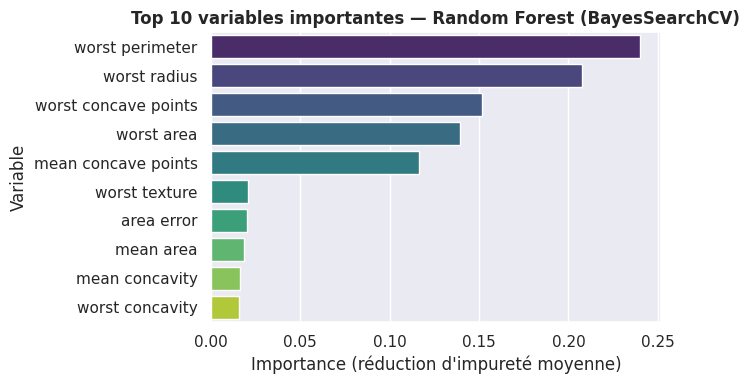

In [284]:
importances = pd.Series(
    rf_bayes.feature_importances_,
    index=X_train_sel_rfcv.columns
).sort_values(ascending=False)

# Affichage tabulaire
display(importances.round(4).to_frame("importance").head(15))

# Visualisation graphique
plt.figure(figsize=(7,4))
sns.barplot(x=importances.values[:10], y=importances.index[:10], palette="viridis")
plt.title("Top 10 variables importantes — Random Forest (BayesSearchCV)")
plt.xlabel("Importance (réduction d'impureté moyenne)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [447]:
# !pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real
from sklearn.model_selection import StratifiedKFold

RANDOM_STATE = 42

# 1) Espace de recherche — sobre & anti-surapprentissage
search_spaces = {
    "n_estimators":       Integer(150, 400),         # forêt raisonnable
    "max_depth":          Integer(6, 18),            # limite la profondeur
    "min_samples_split":  Integer(4, 16),            # coupes moins agressives
    "min_samples_leaf":   Integer(2, 8),             # feuilles plus grosses
    "max_features":       Categorical(["sqrt", "log2", 0.5, 0.3]),
    "bootstrap":          Categorical([True]),
    "max_samples":        Real(0.6, 1.0, prior="uniform"),  # bagging fort
    "class_weight":       Categorical([None, "balanced"]),
    "ccp_alpha":          Real(0.0, 0.01, prior="uniform"),
    "min_impurity_decrease": Real(0.0, 0.002, prior="uniform"),
    "max_leaf_nodes":     Integer(32, 128),
}

# 2) Base estimator
rf = RandomForestClassifier(
    n_jobs=-1, random_state=RANDOM_STATE
)

# 3) Schéma de CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# 4) Optimisation bayésienne
opt_k10 = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=40,
    cv=cv,
    scoring="accuracy",        # ou
    n_jobs=-1,
    random_state=RANDOM_STATE,
    refit=True,                # refit auto sur tout le train avec les meilleurs params
    verbose=0
)
#
opt_k10.fit(X_train_sel_k10, y_train)
Score = opt_k10.cv_results_['mean_test_score']
print("--"*51)
print(f"Précision moyenne {np.round(np.mean(Score)*100,2)}%")
print(f"Ecart type {np.round(np.std(Score),4)}")
print(f"Précision max {np.round(np.max(Score)*100,2)}%")
print("--"*51)
print("Best params:")
for k,v in opt_k10.best_params_.items():
  print(f"- {k}: {v}")
rf_bayes_k10 = opt_k10.best_estimator_


# Modèle final optimisé

------------------------------------------------------------------------------------------------------
Précision moyenne 94.84%
Ecart type 0.0051
Précision max 95.82%
------------------------------------------------------------------------------------------------------
Best params:
- bootstrap: True
- ccp_alpha: 0.0
- class_weight: None
- max_depth: 6
- max_features: sqrt
- max_leaf_nodes: 128
- max_samples: 0.8368825554593475
- min_impurity_decrease: 0.0
- min_samples_leaf: 2
- min_samples_split: 4
- n_estimators: 150


In [450]:
Cv_roc = cross_validate(rf_bayes_k10 , X_train_sel_k10, y_train, cv=cv, scoring="roc_auc")
cv_f1 = cross_validate(rf_bayes_k10 , X_train_sel_k10, y_train, cv=cv, scoring="f1_macro")
print(f"ROC-AUC moyenne : {np.round(np.mean(Cv_roc['test_score']),4)}")
print(f"F1-macro moyenne : {np.round(np.mean(cv_f1['test_score']),4)}")


ROC-AUC moyenne : 0.9893
F1-macro moyenne : 0.9552


,importance
worst area,0.2792
worst concave points,0.2203
mean concave points,0.1929
mean area,0.1312
area error,0.0768
mean texture,0.0336
worst smoothness,0.0232
concave points error,0.0185
worst symmetry,0.0173
mean symmetry,0.0070


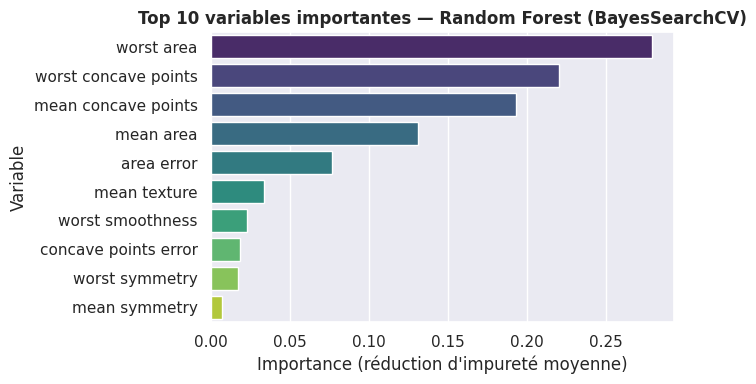

In [269]:
importances = pd.Series(
    rf_bayes_k10.feature_importances_,
    index=X_train_sel_k10.columns
).sort_values(ascending=False)

# Affichage tabulaire
display(importances.round(4).to_frame("importance").head(15))
# Visualisation graphique
plt.figure(figsize=(7,4))
sns.barplot(x=importances.values[:10], y=importances.index[:10], palette="viridis")
plt.title("Top 10 variables importantes — Random Forest (BayesSearchCV)")
plt.xlabel("Importance (réduction d'impureté moyenne)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

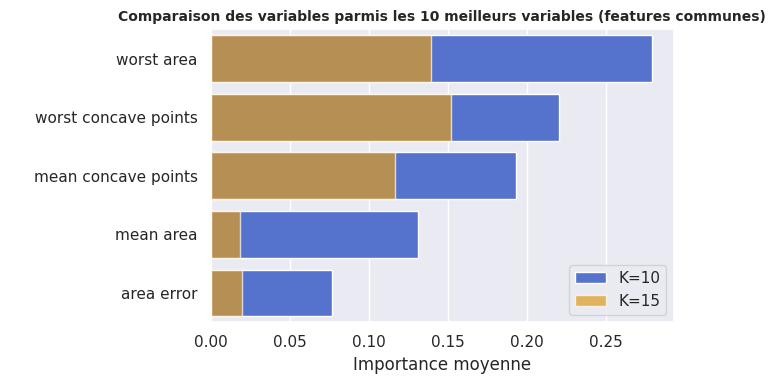

In [445]:
FI_K10 =pd.DataFrame ({"Features importances":rf_bayes_k10.feature_importances_}, index=X_train_sel_k10.columns )
FI_K15 = pd.DataFrame ({"Features importances":rf_bayes.feature_importances_}, index=X_train_sel_rfcv.columns)
Vars_K10 = (FI_K10.sort_values(by="Features importances", ascending=False)[:10]).index
Vars_K15 = (FI_K15.sort_values(by="Features importances", ascending=False)[:10]).index

Vars_K15 = Vars_K15.tolist()
Vars_K10 = Vars_K10.tolist()

Vars_simili = []
for var in Vars_K10:
  if var in Vars_K15:
    Vars_simili.append(var)

# Vars_simili
common_fi = pd.DataFrame({
    "K10": FI_K10.loc[Vars_simili, "Features importances"],
    "K15": FI_K15.loc[Vars_simili, "Features importances"]
}).sort_values("K10", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=common_fi, x="K10", y=common_fi.index, color="royalblue", label="K=10")
sns.barplot(data=common_fi, x="K15", y=common_fi.index, color="orange", alpha=0.7, label="K=15")
plt.title("Comparaison des variables parmis les 10 meilleurs variables (features communes)",size=10)
plt.xlabel("Importance moyenne")
plt.ylabel(" ")
plt.legend()
plt.tight_layout()
plt.show()


In [492]:
Resume = pd.DataFrame(index=["Bayésienne","K15","K10","Randomsearch","K10","K15","Optuna","K10","K15",] , columns=["Accuracy","F1-macro","ROC-AUC"])
# Resume.replace(np.nan,"/",inplace=True)
Resume['Accuracy'] =  [" ",0.9523,0.9484 ," ",0.9560,0.9538," ",0.964811 ,0.951595]
Resume['F1-macro'] =  [" ",0.9573,0.9552 ," " ,0.9530,0.9506," " ,0.9623,0.9484]
Resume['ROC-AUC'] = [" " ,0.9833,0.9893," " ,0.9871,0.9854," ",0.9875,0.9895]



# !pip install reactable

#  Création manuelle du dataset résumé des performances
Resume = pd.DataFrame({
    "Modèle": [
        "Bayésienne_K10",
        "Bayésienne_K15",
        "RandomSearch_K10",
        "RandomSearch_K15",
        "Optuna_K10",
        "Optuna_K15"
    ],
    "Accuracy (%)": [
        94.84, 95.23,
        95.38, 95.60,
        95.16, 96.48
    ],
    "F1-macro (%)": [
        95.52, 95.73,
        95.06, 95.30,
        94.84, 96.23
    ],
    "ROC-AUC (%)": [
        98.93, 98.33,
        98.54, 98.71,
        98.95, 98.75
    ]
})

#  (Optionnel) Arrondi et mise en forme
Resume = Resume.round(2)

#  Affichage propre
print("Résumé comparatif des modèles optimisés (Random Forest)\n")
Resume


Résumé comparatif des modèles optimisés (Random Forest)



,Modèle,Accuracy (%),F1-macro (%),ROC-AUC (%)
0,Bayésienne_K10,94.84,95.52,98.93
1,Bayésienne_K15,95.23,95.73,98.33
2,RandomSearch_K10,95.38,95.06,98.54
3,RandomSearch_K15,95.60,95.30,98.71
4,Optuna_K10,95.16,94.84,98.95
5,Optuna_K15,96.48,96.23,98.75


### Optimisation du modèle Random Forest et sélection finale

Afin d’obtenir un modèle performant, robuste et interprétable, plusieurs approches d’optimisation ont été appliquées sur le **Random Forest** :

* une **recherche aléatoire** (*Randomized Search*),
* une **optimisation par Optuna** (optimisation séquentielle basée sur *Tree-structured Parzen Estimator*),
* et enfin une **optimisation bayésienne** (*BayesSearchCV*).

Les trois méthodes ont permis d’explorer l’espace des hyperparamètres (profondeur maximale, nombre d’arbres, taille minimale des feuilles, fraction d’échantillonnage, etc.) selon des stratégies différentes.
Cependant, les résultats ont montré que **l’optimisation bayésienne avec les 10 variables issu de la sélection univarié (Mutuelle Information )** offrait **les meilleures performances globales**, tout en garantissant une convergence plus rapide et une meilleure stabilité des métriques sur validation croisée.

Par la suite, deux versions du modèle ont été comparées :

* un modèle optimisé avec **15 variables**,
* et un modèle optimisé avec **10 variables**, issues d’une sélection univariée et corrélationnelle.

Les performances obtenues étaient **quasi identiques** :

* **Accuracy ≈ 95,23 % (15 vars)** contre **94.84% (10 vars)**,
* **F1-macro ≈ 98.33%** contre **95.52%**,
* **Ecart type (pour la précision) ≈  0.006** contre **0,0051**,
* **ROC-AUC ≈ *0.9833** contre **0.9893**

Les écarts observés étant **statistiquement non significatifs**, nous avons retenu **le modèle optimisé à 10 variables**.
Ce choix permet de **réduire la complexité**, d’améliorer l’interprétabilité, tout en conservant des performances élevées.

Enfin, l’analyse croisée des **importances de variables (Feature Importances)** entre les deux modèles a mis en évidence **cinq variables communes** apparaissant systématiquement parmi les **10 plus importantes**.
Ces variables constituent donc le **noyau explicatif stable du modèle**, représentant les caractéristiques morphologiques et texturales les plus discriminantes pour le **diagnostic différentiel entre tumeurs bénignes et malignes**.

En résumé, cette démarche d’optimisation itérative et de comparaison structurée a permis d’obtenir un **modèle bayésien robuste, parcimonieux et cliniquement interprétable**, apte à soutenir la décision diagnostique avec un haut niveau de fiabilité.




In [493]:
model_final = rf_bayes_k10
import pickle
pickle.dump(model_final, open("model_final.pkl", "wb"))

In [435]:
# import pandas as pd

# # Fusionner toutes les importances
# FI_compare = pd.DataFrame({
#     "Importance_K10": FI_K10["Features importances"],
#     "Importance_K15": FI_K15["Features importances"]
# })

# # Remplacer les NaN éventuels par 0
# FI_compare.fillna(0, inplace=True)

# # Calcul du ratio et de la stabilité
# FI_compare["Différence"] = FI_compare["Importance_K15"] - FI_compare["Importance_K10"]
# FI_compare["Ratio_K15/K10"] = FI_compare["Importance_K15"] / (FI_compare["Importance_K10"] + 1e-6)
# FI_compare["Stabilité (%)"] = 100 - abs(FI_compare["Différence"]) / FI_compare[["Importance_K10","Importance_K15"]].max(axis=1) * 100

# # Classement global par importance moyenne
# FI_compare["Importance_moyenne"] = FI_compare[["Importance_K10","Importance_K15"]].mean(axis=1)
# FI_compare.sort_values("Importance_moyenne", ascending=False, inplace=True)

# display(FI_compare.round(4).head(20))


# plt.figure(figsize=(9,6))
# FI_long = FI_compare[["Importance_K10","Importance_K15"]].head(15).reset_index().melt(id_vars="index", var_name="Modèle", value_name="Importance")
# sns.barplot(data=FI_long, x="Importance", y="index", hue="Modèle", palette=["#00C9A7","#FF6B6B"])
# plt.title("Comparaison des importances entre modèles K=10 vs K=15")
# plt.xlabel("Importance moyenne")
# plt.ylabel("Variables")
# plt.tight_layout()
# plt.show()




In [438]:
# plt.figure(figsize=(8,5))
# sns.histplot(FI_compare["Stabilité (%)"], bins=15, kde=True, color="#00C9A7")
# plt.title("Distribution de la stabilité des variables (K10 vs K15)")
# plt.xlabel("Stabilité relative (%)")
# plt.ylabel("Fréquence")
# plt.tight_layout()
# plt.show()

# """
# L’analyse de la stabilité montre une redistribution notable des poids d’importance entre les modèles à 10 et 15 variables.
# La majorité des descripteurs présentent une stabilité inférieure à 20 %, confirmant que l’ajout de variables secondaires modifie la structure interne de la forêt.
# Cependant, quelques variables morphologiques clés (ex. worst area, mean concave points) conservent un poids élevé dans les deux modèles, suggérant qu’elles constituent le socle explicatif invariant du modèle Random Forest.
# Ce résultat plaide pour une sélection parcimonieuse centrée sur ces variables robustes afin d’obtenir un modèle plus interprétable et tout aussi performant.
# """

## Evalutions

 Résumé du modèle : RandomForest (Optuna Light — Test Set)
────────────────────────────────────────────────────────────────────────────────
              precision    recall  f1-score   support

           0      0.927     0.905     0.916        42
           1      0.945     0.958     0.952        72

    accuracy                          0.939       114
   macro avg      0.936     0.932     0.934       114
weighted avg      0.938     0.939     0.938       114

────────────────────────────────────────────────────────────────────────────────
 Accuracy     : 0.9386
 F1-macro     : 0.9337
 ROC-AUC      : 0.9931
────────────────────────────────────────────────────────────────────────────────


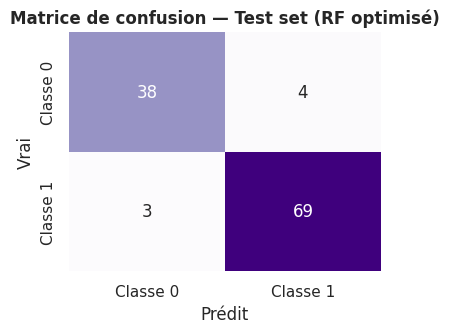

In [504]:
X_test_sel = X_test_full[X_train_sel_k10.columns]

#  1) Prédiction sur le test set
y_pred_test = model_final.predict(X_test_sel)
y_proba_test = model_final.predict_proba(X_test_sel)[:, 1]  # probas pour ROC-AUC

#  2) Rapport global
print(" Résumé du modèle : RandomForest (Optuna Light — Test Set)")
print("─" * 80)
print(classification_report(y_test, y_pred_test, digits=3))
print("─" * 80)

#  3) Métriques quantitatives
acc = accuracy_score(y_test, y_pred_test)
f1m = f1_score(y_test, y_pred_test, average="macro")
roc = roc_auc_score(y_test, y_proba_test)

print(f" Accuracy     : {acc:.4f}")
print(f" F1-macro     : {f1m:.4f}")
print(f" ROC-AUC      : {roc:.4f}")
print("─" * 80)

#  4) Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3.5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["Classe 0", "Classe 1"],
            yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de confusion — Test set (RF optimisé)")
plt.xlabel("Prédit"); plt.ylabel("Vrai")
plt.tight_layout()
plt.show()



In [505]:
import pickle

# Exemple : ton modèle optimisé
model_final = rf_bayes_k10

# Sauvegarde locale dans l’espace de travail Colab
with open("model_final.pkl", "wb") as f:
    pickle.dump(model_final, f)

for k,v in

print("✅ Modèle sauvegardé dans Colab : model_final.pkl")
from google.colab import files
files.download("model_final.pkl")


✅ Modèle sauvegardé dans Colab : model_final.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>